# <u><I>CAPSTONE PROJECT </I></U>

## Problem statement:
A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. For example, you want to sell a house and you don’t know the price which you may expect — it can’t be too low or too high. To find house price you usually try to find similar properties in your neighborhood and based on gathered data you will try to assess your house price.

## Objective:
Take advantage of all of the feature variables available below, use it to analyse and predict house prices.

## Variables:
1. <b>cid:</b>a notation for a house 
2. <b>dayhours:</b> Date house was sold 
3. <b>price:</b> Price is prediction target 
4. <b>room_bed:</b> Number of Bedrooms/House 
5. <b>room_bath:</b> Number of bathrooms/bedrooms 
6. <b>living_measure:</b> square footage of the home 
7. <b>lot_measure:</b> quare footage of the lot 
8. <b>ceil:</b> Total floors (levels) in house 
9. <b>coast:</b> House which has a view to a waterfront 
10. <b>sight:</b> Has been viewed 
11. <b>condition:</b> How good the condition is (Overall) 
12. <b>quality:</b> grade given to the housing unit, based on grading system 
13. <b>ceil_measure:</b> square footage of house apart from basement 
14. <b>basement_measure:</b> square footage of the basement 
15. <b>yr_built:</b> Built Year 
16. <b>yr_renovated:</b> Year when house was renovated 
17. <b>zipcode:</b> zip 
18. <b>lat:</b> Latitude coordinate 
19. <b>long:</b> Longitude coordinate 
20. <b>living_measure15:</b> Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area 
21. <b>lot_measure15:</b> lotSize area in 2015(implies-- some renovations) 
22. <b>furnished:</b> Based on the quality of room 
23. <b>total_area:</b> Measure of both living and lot

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  mean_squared_error
import scipy
import matplotlib.pyplot
import statistics
import warnings
from matplotlib.pyplot import figure
warnings.filterwarnings("ignore")

### Reading Dataset and Renaming Columns

In [2]:
df=pd.read_excel('innercity.xlsx')
df.sample(5)

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
16572,9839301165,20141001T000000,998500,2.0,1.00,1570.0,4400.0,1.5,0,0.0,...,0.0,1914,0,98122,47.6112,-122.293,1850.0,4400.0,0.0,5970
16934,9485930120,20141014T000000,390000,3.0,2.25,2270.0,32112.0,1,0,0.0,...,530.0,1980,0,98042,47.3451,-122.094,2310.0,41606.0,0.0,34382
19745,1087900050,20140603T000000,560000,3.0,1.75,2000.0,10182.0,1,0,0.0,...,600.0,1963,0,98033,47.6616,-122.175,2050.0,10182.0,0.0,12182
12633,8946700140,20141121T000000,395000,4.0,3.00,2500.0,6278.0,2,0,0.0,...,0.0,2002,0,98092,47.3325,-122.168,2700.0,7200.0,1.0,8778
20746,6072800246,20140702T000000,3300000,5.0,6.25,8020.0,21738.0,2,0,0.0,...,0.0,2001,0,98006,47.5675,-122.189,4160.0,18969.0,1.0,29758


In [3]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1],'\n''Total values in dataset:',df.size)

The number of rows (observations) is 21613 
The number of columns (variables) is 23 
Total values in dataset: 497099


In [4]:
df.rename(columns ={'dayhours':'House_Sold_Date', 'price':'Price','room_bed':'Bedrooms','room_bath':'Bathrooms',
                   'living_measure':'Total_Living_Area','lot_measure':'Land_Plot_Area','ceil':'Total_Floors',
                   'coast':'Sea_view','sight':'Sight','condition':'House_Condition','quality':'Quality_Rating',
                   'ceil_measure':'Living_Area_excl_Basement','basement':'Basement_Area','yr_built':'Yr_built',
                   'yr_renovated':'Yr_renovated','zipcode':'Zipcode','lat':'Latitude','long':'Longitude',
                   'living_measure15':'Total_Living_Area_2015','lot_measure15':'Land_Plot_Area_2015','furnished':'Furnished',
                   'total_area':'Total_Property_Area'}, inplace = True)
df['House_Sold_Date']= [x.strip().replace('T000000','') for x in df.House_Sold_Date]
df['House_Sold_Date'] = pd.to_datetime(df.House_Sold_Date)
df['Yr_sold'] = df.House_Sold_Date.dt.year
df.drop(['cid','House_Sold_Date'],axis=1,inplace=True)
df.head()

,Price,Bedrooms,Bathrooms,Total_Living_Area,Land_Plot_Area,Total_Floors,Sea_view,Sight,House_Condition,Quality_Rating,...,Yr_built,Yr_renovated,Zipcode,Latitude,Longitude,Total_Living_Area_2015,Land_Plot_Area_2015,Furnished,Total_Property_Area,Yr_sold
0,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,3,8.0,...,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490,2015
1,190000,2.0,1.00,670.0,3101.0,1,0,0.0,4,6.0,...,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771,2015
2,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,3,8.0,...,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455,2014
3,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,3,8.0,...,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461,2014
4,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,3,7.0,...,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710,2015


In [5]:
df.head().T

,0,1,2,3,4
Price,600000,190000,735000,257000,450000
Bedrooms,4.0,2.0,4.0,3.0,2.0
Bathrooms,1.75,1.0,2.75,2.5,1.0
Total_Living_Area,3050.0,670.0,3040.0,1740.0,1120.0
Land_Plot_Area,9440.0,3101.0,2415.0,3721.0,4590.0
Total_Floors,1,1,2,2,1
Sea_view,0,0,1,0,0
Sight,0.0,0.0,4.0,0.0,0.0
House_Condition,3,4,3,3,3
Quality_Rating,8.0,6.0,8.0,8.0,7.0


### Visual Inspection of Data

In [6]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1],'\n''Total values in dataset:',df.size)

The number of rows (observations) is 21613 
The number of columns (variables) is 22 
Total values in dataset: 475486


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Price                      21613 non-null  int64  
 1   Bedrooms                   21505 non-null  float64
 2   Bathrooms                  21505 non-null  float64
 3   Total_Living_Area          21596 non-null  float64
 4   Land_Plot_Area             21571 non-null  float64
 5   Total_Floors               21571 non-null  object 
 6   Sea_view                   21612 non-null  object 
 7   Sight                      21556 non-null  float64
 8   House_Condition            21556 non-null  object 
 9   Quality_Rating             21612 non-null  float64
 10  Living_Area_excl_Basement  21612 non-null  float64
 11  Basement_Area              21612 non-null  float64
 12  Yr_built                   21612 non-null  object 
 13  Yr_renovated               21613 non-null  int

In [8]:
pd.DataFrame(data={'# Missing Values':df.isna().sum(),
                '% of Missing Values':round(df.isnull().sum()/df.isnull().count()*100,2)}).sort_values(by='# Missing Values',ascending=False)

,# Missing Values,% of Missing Values
Total_Living_Area_2015,166,0.77
Bathrooms,108,0.50
Bedrooms,108,0.50
Sight,57,0.26
House_Condition,57,0.26
Land_Plot_Area,42,0.19
Total_Floors,42,0.19
Total_Property_Area,29,0.13
Furnished,29,0.13
Land_Plot_Area_2015,29,0.13


In [9]:
df.replace('$', np.nan, inplace = True)
pd.DataFrame(data={'# Missing Values':df.isna().sum(),
                '% of Missing Values':round(df.isnull().sum()/df.isnull().count()*100,2)}).sort_values(by='# Missing Values',ascending=False)

,# Missing Values,% of Missing Values
Total_Living_Area_2015,166,0.77
Bathrooms,108,0.50
Bedrooms,108,0.50
House_Condition,85,0.39
Total_Floors,72,0.33
Total_Property_Area,68,0.31
Sight,57,0.26
Land_Plot_Area,42,0.19
Longitude,34,0.16
Sea_view,31,0.14


In [10]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Price,21613.0,540182.158793,367362.231718,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
Bedrooms,21505.0,3.371355,0.930289,0.0000,3.000,3.0000,4.000,3.300000e+01
Bathrooms,21505.0,2.115171,0.770248,0.0000,1.750,2.2500,2.500,8.000000e+00
Total_Living_Area,21596.0,2079.860761,918.496121,290.0000,1429.250,1910.0000,2550.000,1.354000e+04
Land_Plot_Area,21571.0,15104.583283,41423.619385,520.0000,5040.000,7618.0000,10684.500,1.651359e+06
Total_Floors,21541.0,1.494127,0.539912,1.0000,1.000,1.5000,2.000,3.500000e+00
Sea_view,21582.0,0.007460,0.086050,0.0000,0.000,0.0000,0.000,1.000000e+00
Sight,21556.0,0.234366,0.766438,0.0000,0.000,0.0000,0.000,4.000000e+00
House_Condition,21528.0,3.409327,0.650709,1.0000,3.000,3.0000,4.000,5.000000e+00
Quality_Rating,21612.0,7.656857,1.175484,1.0000,7.000,7.0000,8.000,1.300000e+01


## EDA

In [11]:
df_eda=df.copy()
print('Data Shape before Removing Null Values:',df_eda.shape)
df_eda.dropna(inplace=True)
print('Data Shape after Removing Null Values:',df_eda.shape)

Data Shape before Removing Null Values: (21613, 22)
Data Shape after Removing Null Values: (21288, 22)


In [12]:
a=df_eda[['Price','Yr_built','Yr_renovated','Yr_sold','Total_Living_Area_2015','Land_Plot_Area_2015','Living_Area_excl_Basement','Basement_Area','Total_Living_Area','Land_Plot_Area','Total_Property_Area']]
pd.DataFrame(data={'Skewness':round(a.skew(),2),'Kurtosis':round(a.kurtosis(),2)})

,Skewness,Kurtosis
Price,3.88,31.49
Yr_built,-0.47,-0.66
Yr_renovated,4.57,18.89
Yr_sold,0.76,-1.43
Total_Living_Area_2015,1.11,1.59
Land_Plot_Area_2015,9.55,152.88
Living_Area_excl_Basement,1.42,3.19
Basement_Area,1.58,2.73
Total_Living_Area,1.45,5.08
Land_Plot_Area,13.13,288.08


## Univariate Analysis for Continuous Variables

In [13]:
def uniplot(x):
    fig,axs = plt.subplots(2,figsize=(12,10))
    axs[0].set_title('Distribution of '+x)
    sns.distplot(df_eda[x],ax=axs[0],color='teal')
    axs[1].set_title('Boxplot of '+x+' to see outliers')
    sns.boxplot(df_eda[x],ax=axs[1],palette='dark')
    plt.tight_layout()
    plt.show()

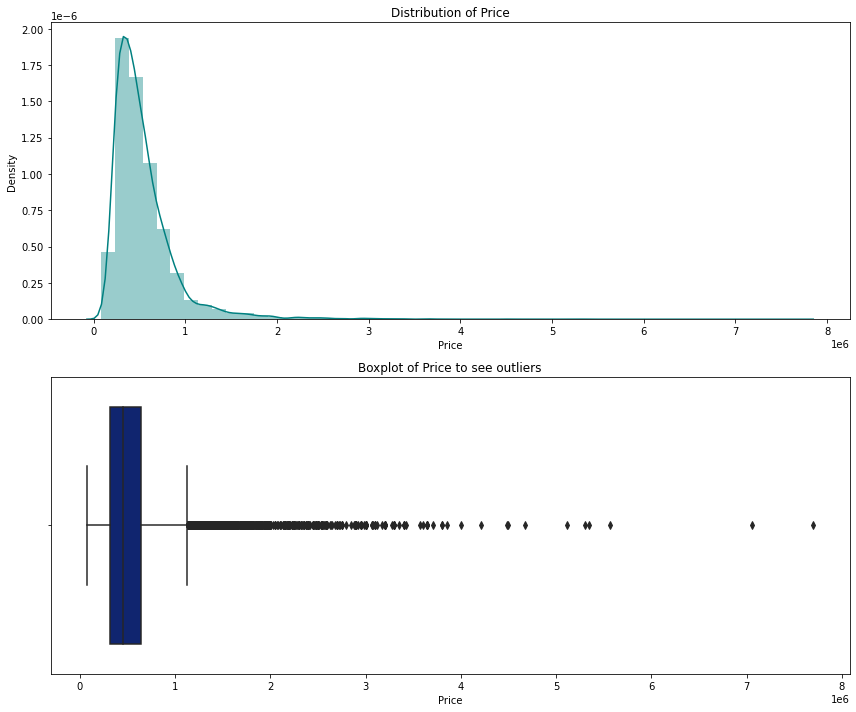

In [14]:
uniplot('Price')

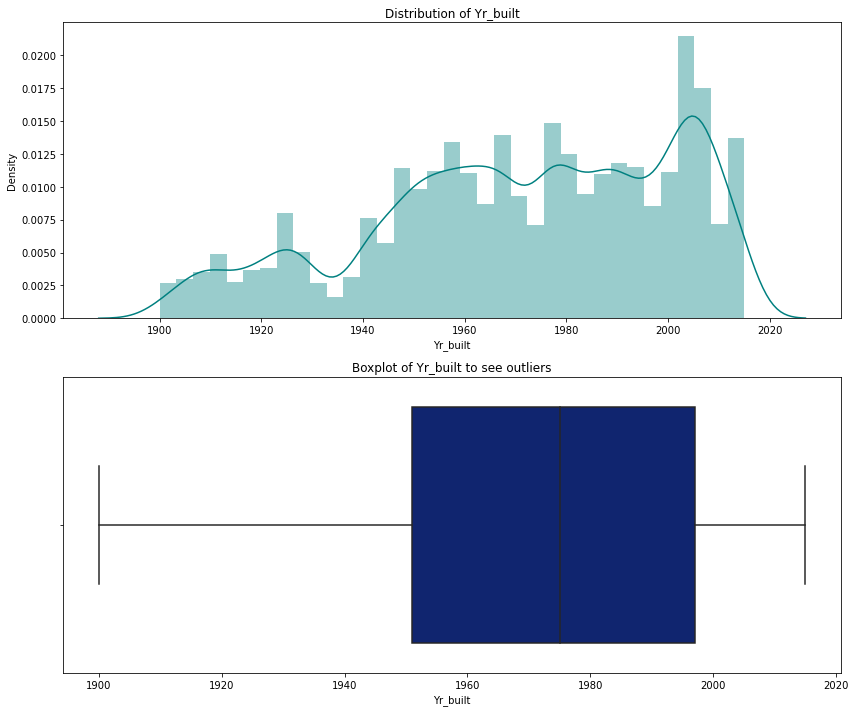

In [15]:
uniplot('Yr_built')

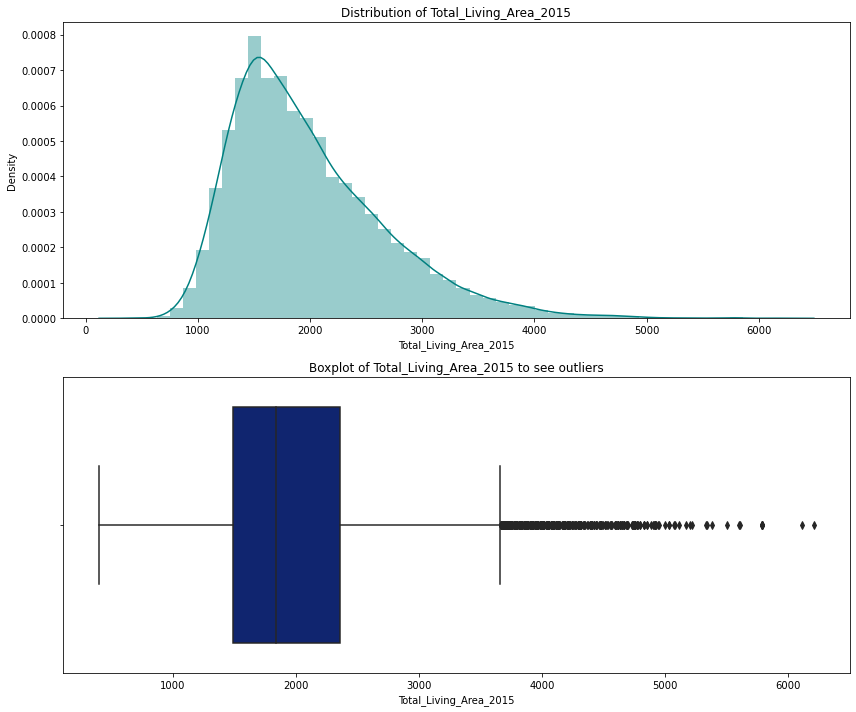

In [16]:
uniplot('Total_Living_Area_2015')

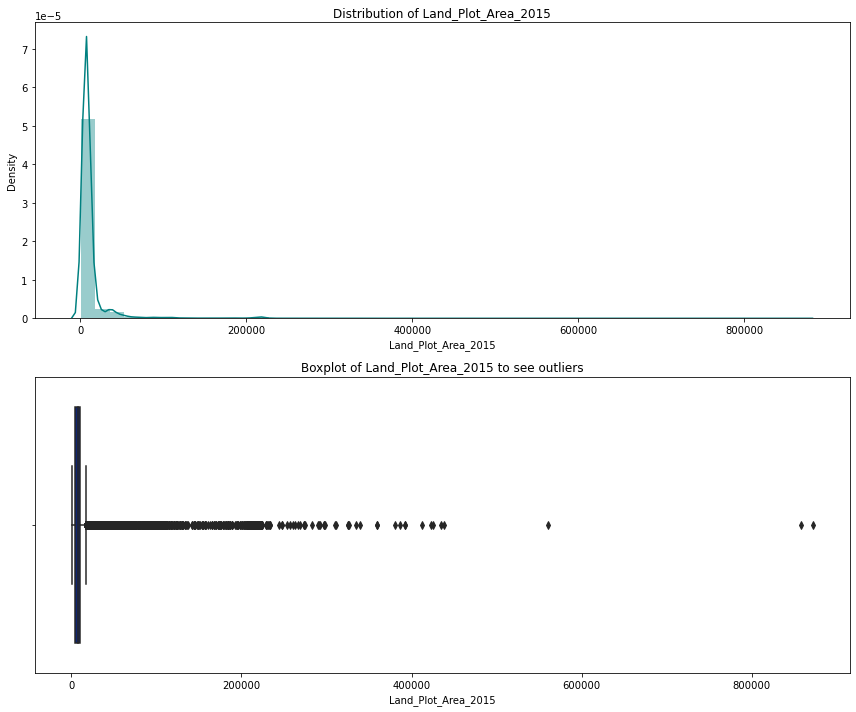

In [17]:
uniplot('Land_Plot_Area_2015')

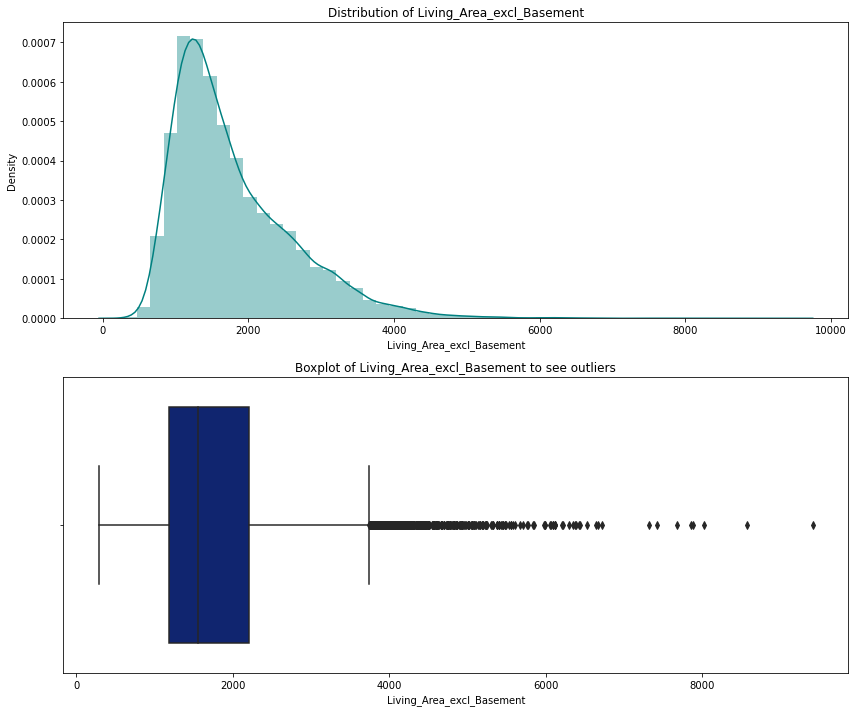

In [18]:
uniplot('Living_Area_excl_Basement')

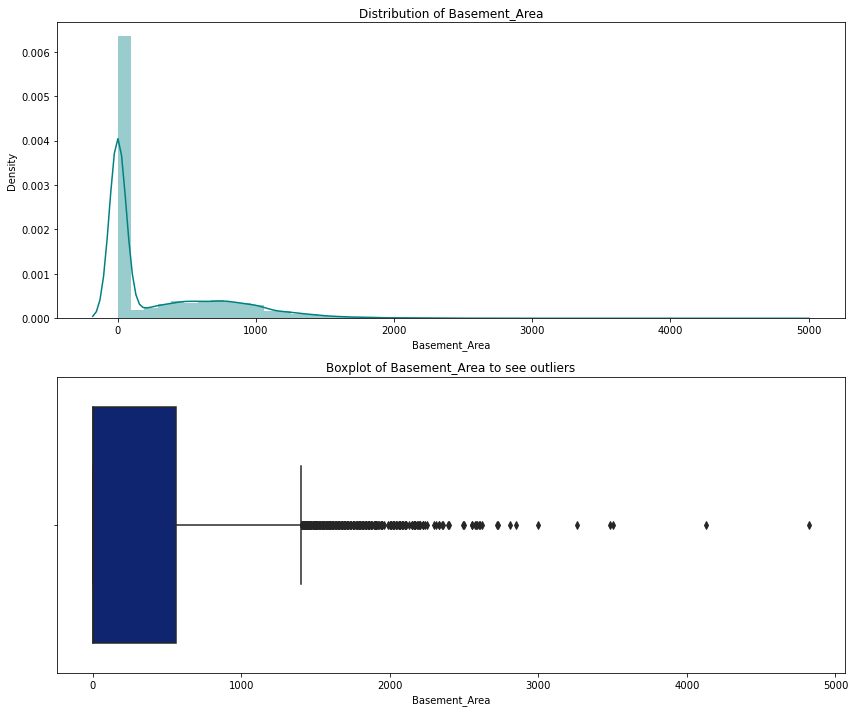

In [19]:
uniplot('Basement_Area')

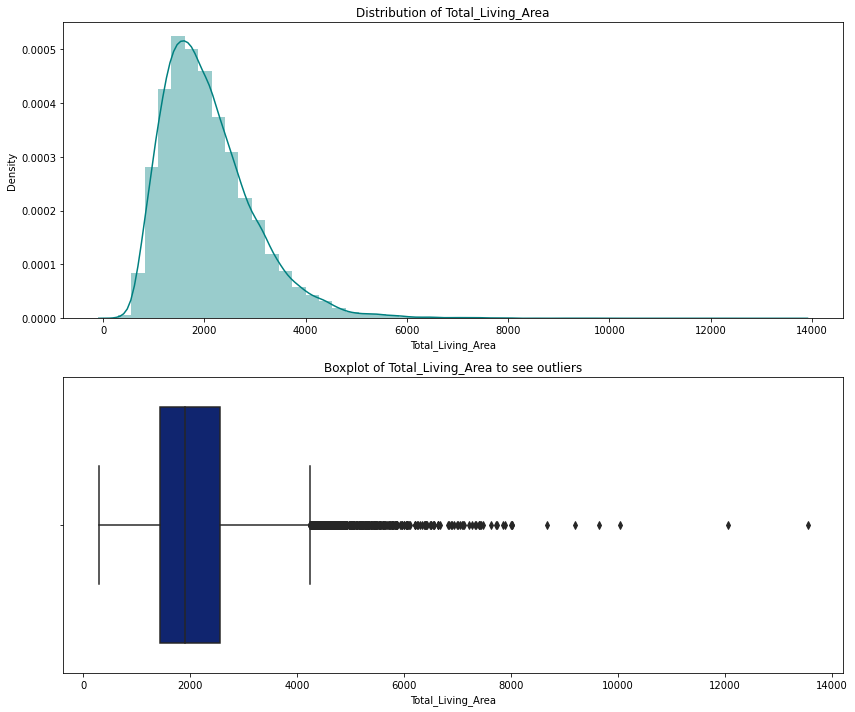

In [20]:
uniplot('Total_Living_Area')

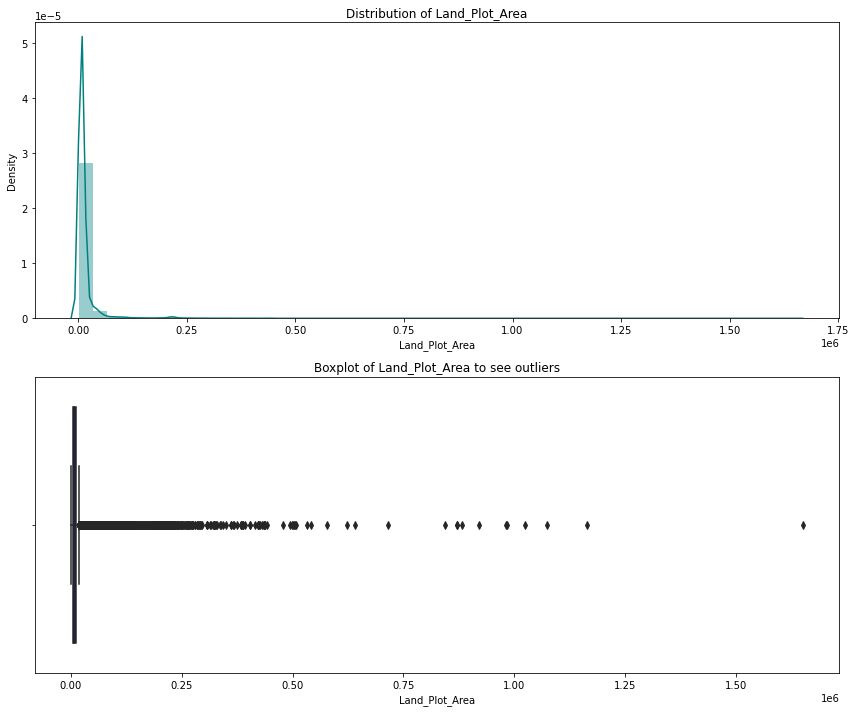

In [21]:
uniplot('Land_Plot_Area')

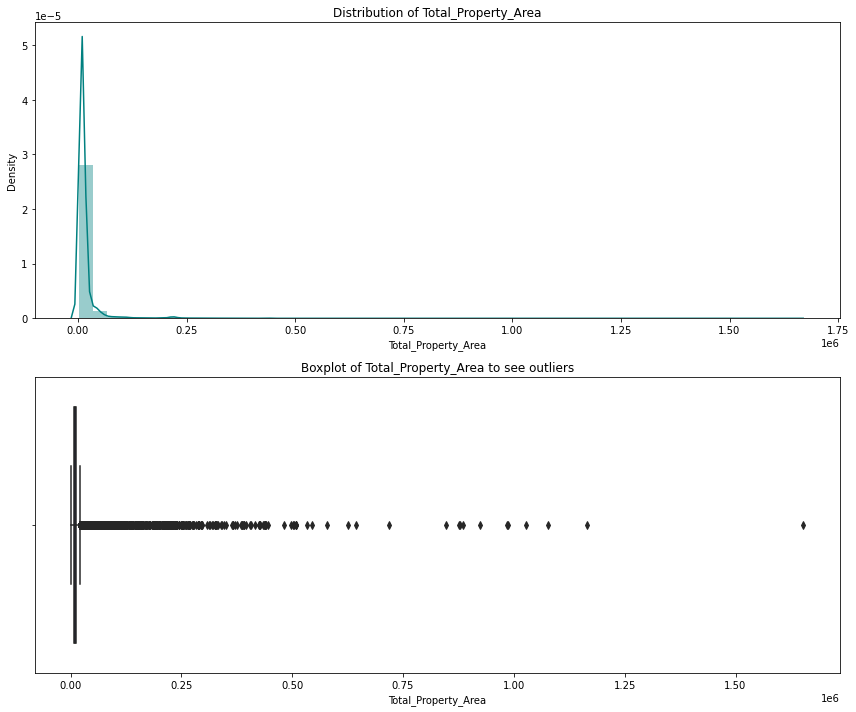

In [22]:
uniplot('Total_Property_Area')

## Univariate Analysis for Categorical Variables

In [23]:
def perc_on_bar(z):
    total = len(df_eda[z]) # length of the column
    plt.figure(figsize=(17,8))
    ax = sns.countplot(df_eda[z],palette='deep')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.ylabel('Number of Houses')
    plt.xlabel(z+' Distribution ')
    plt.title(z+' Distribution (in %)')
    plt.show() # show the plot

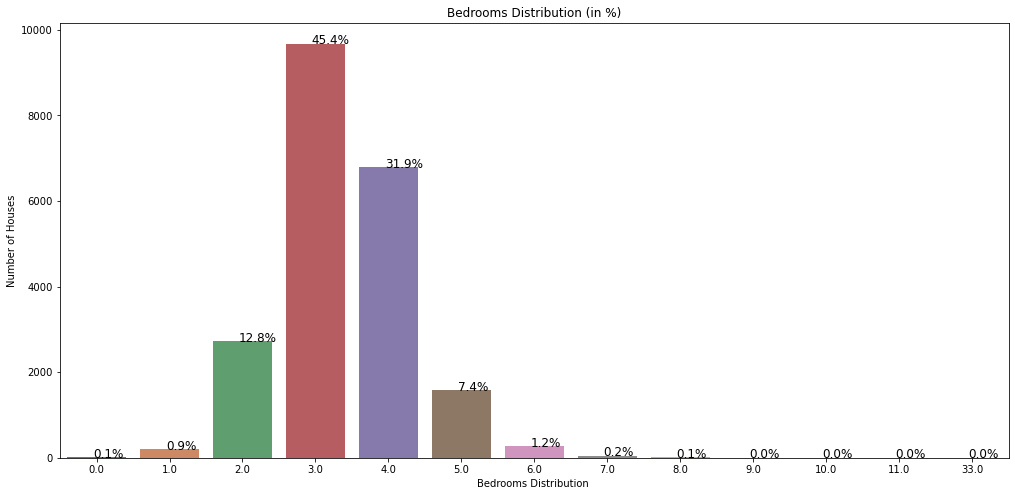

In [24]:
perc_on_bar('Bedrooms')

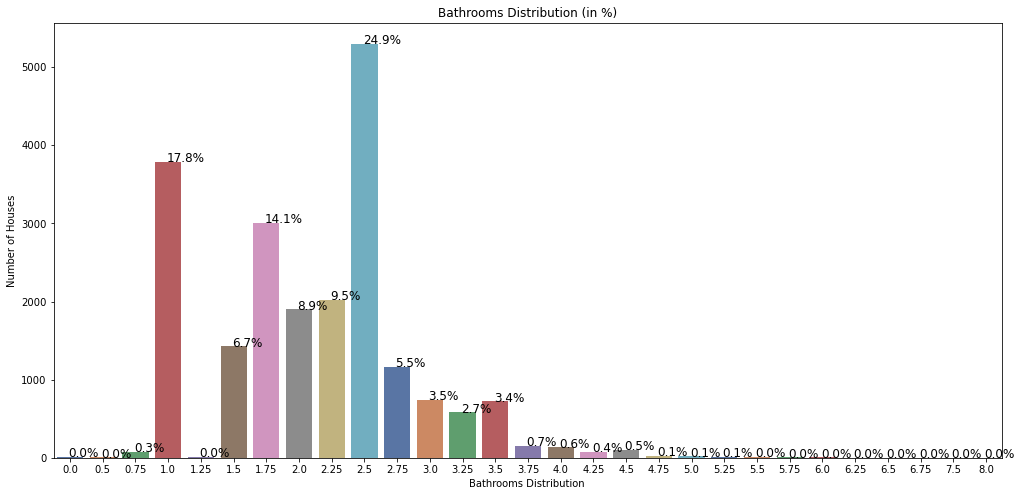

In [25]:
perc_on_bar('Bathrooms')

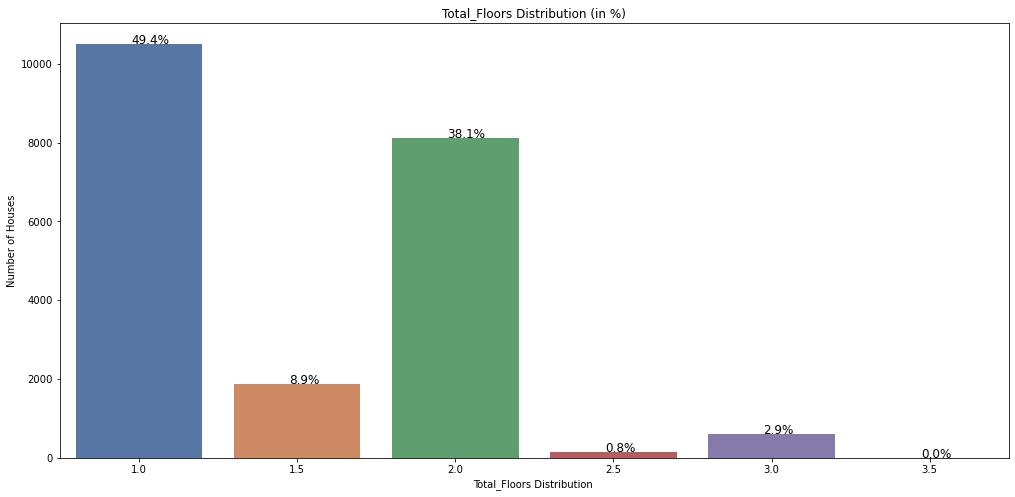

In [26]:
perc_on_bar('Total_Floors')

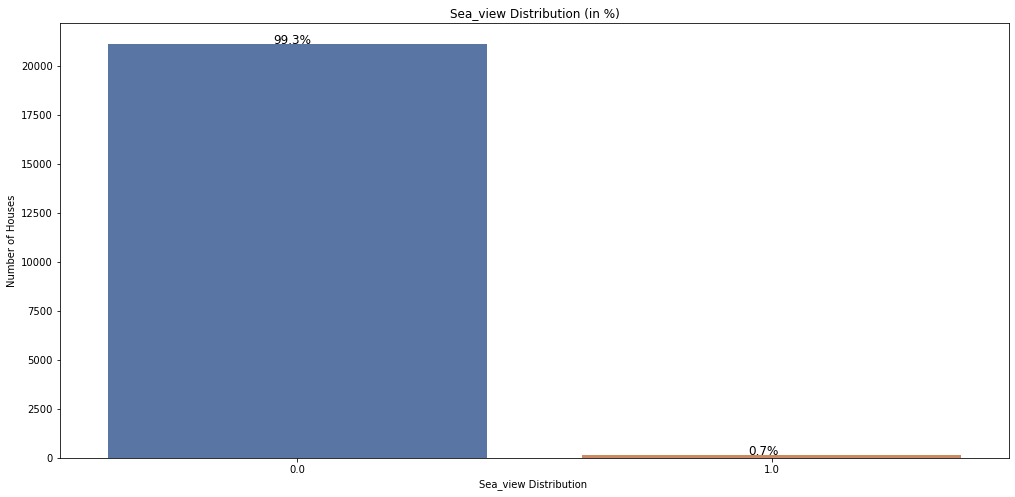

In [27]:
perc_on_bar('Sea_view')

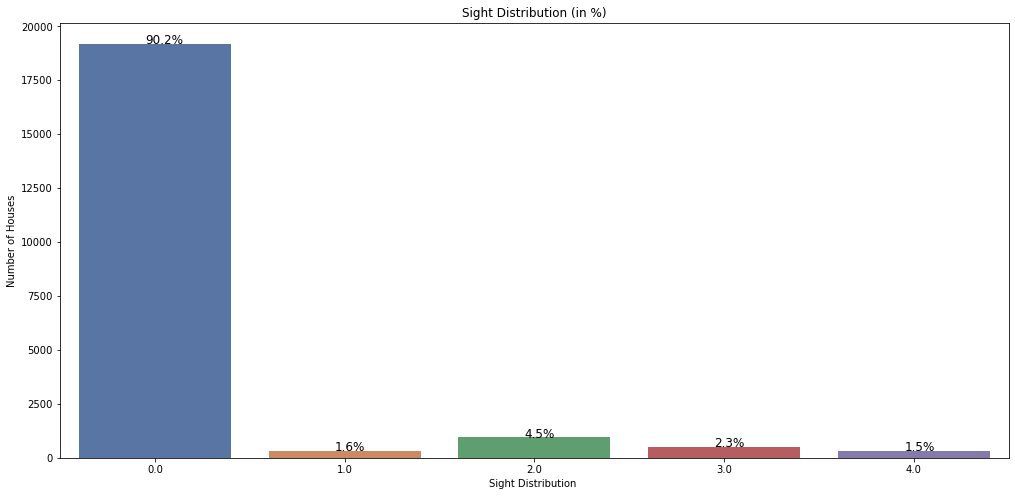

In [28]:
perc_on_bar('Sight')

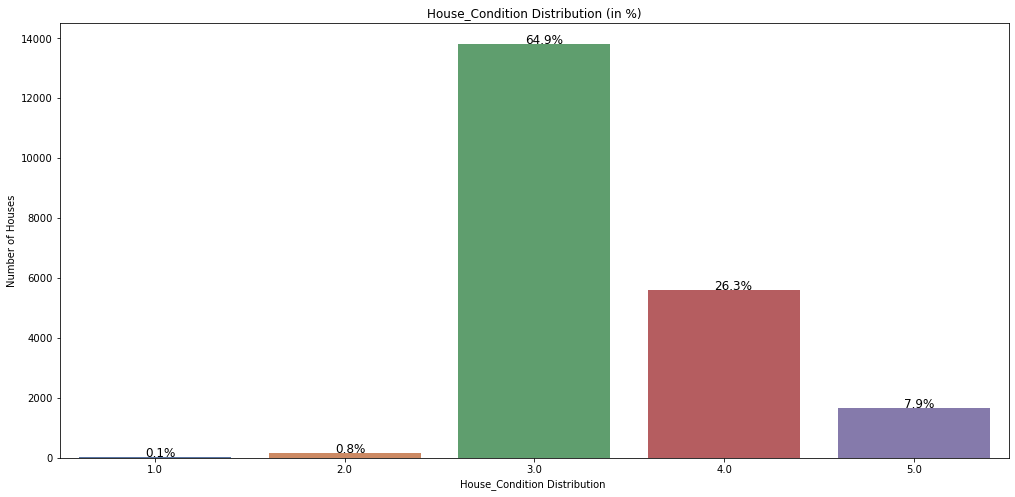

In [29]:
perc_on_bar('House_Condition')

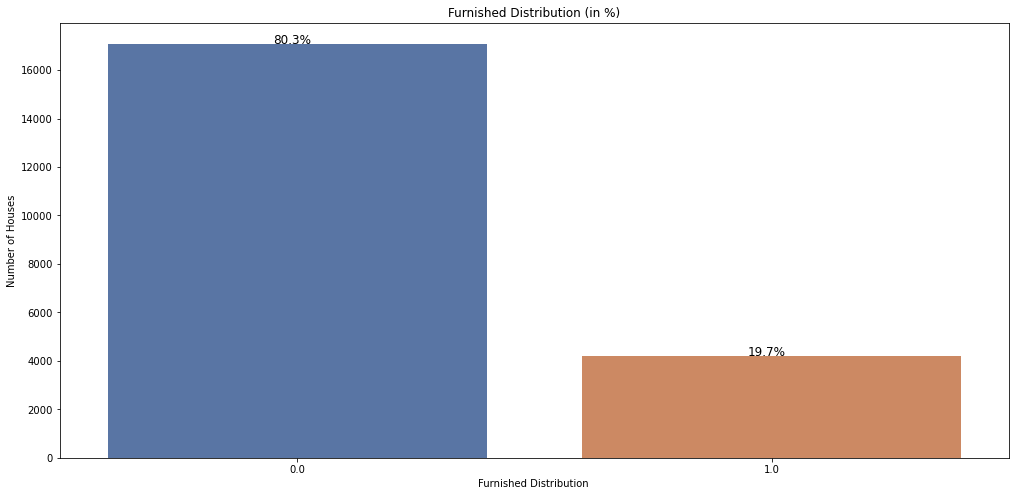

In [30]:
perc_on_bar('Furnished')

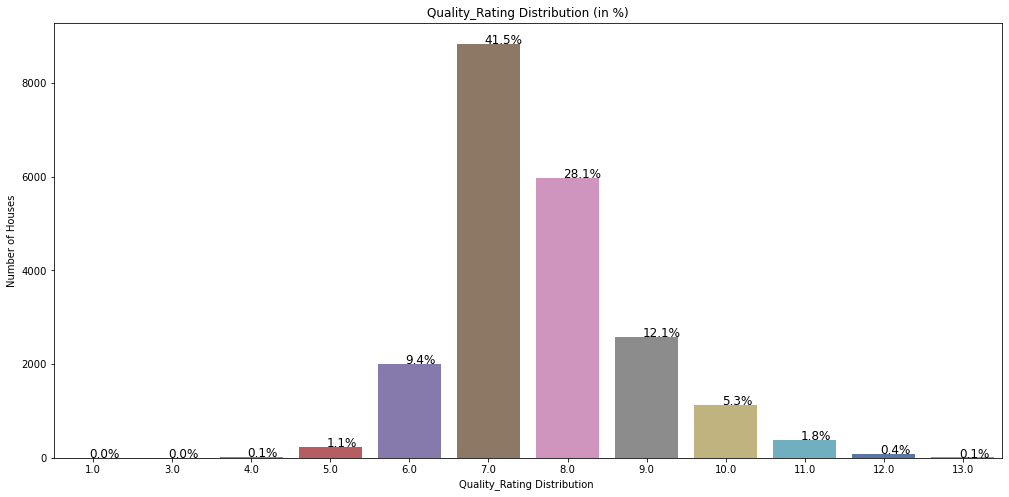

In [31]:
perc_on_bar('Quality_Rating')

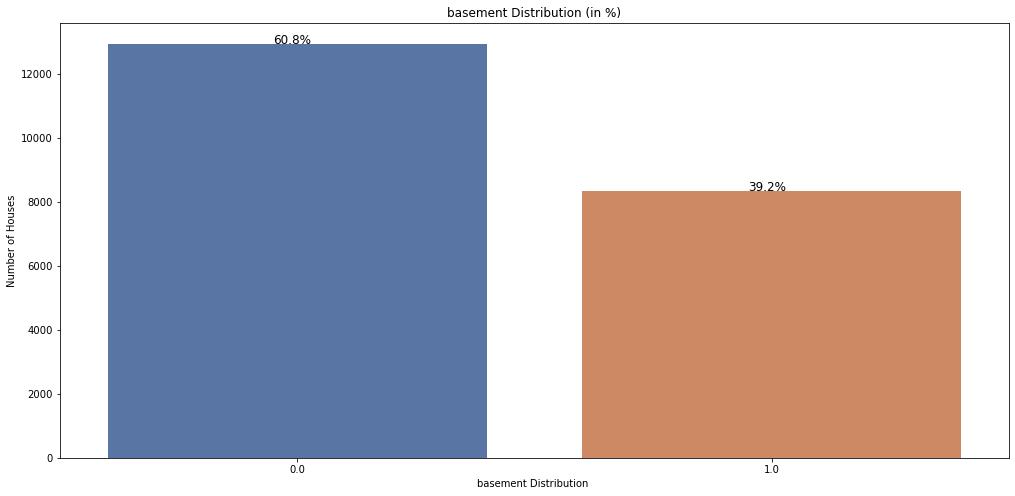

In [32]:
df_eda['basement'] = df_eda['Basement_Area']
df_eda.loc[df_eda.basement!=0,'basement'] = 1
perc_on_bar('basement')

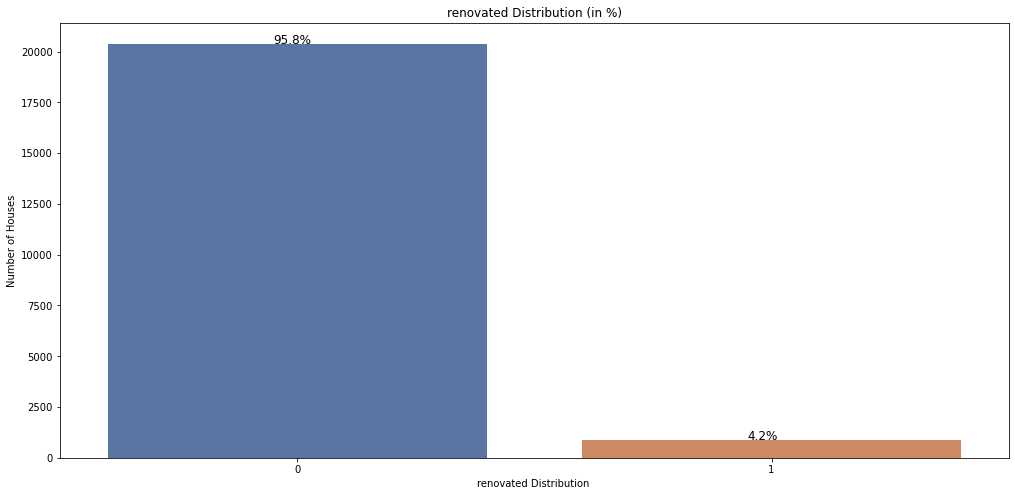

In [33]:
df_eda['renovated'] = df_eda['Yr_renovated']
df_eda.loc[df_eda.renovated!=0,'renovated'] = 1
perc_on_bar('renovated')

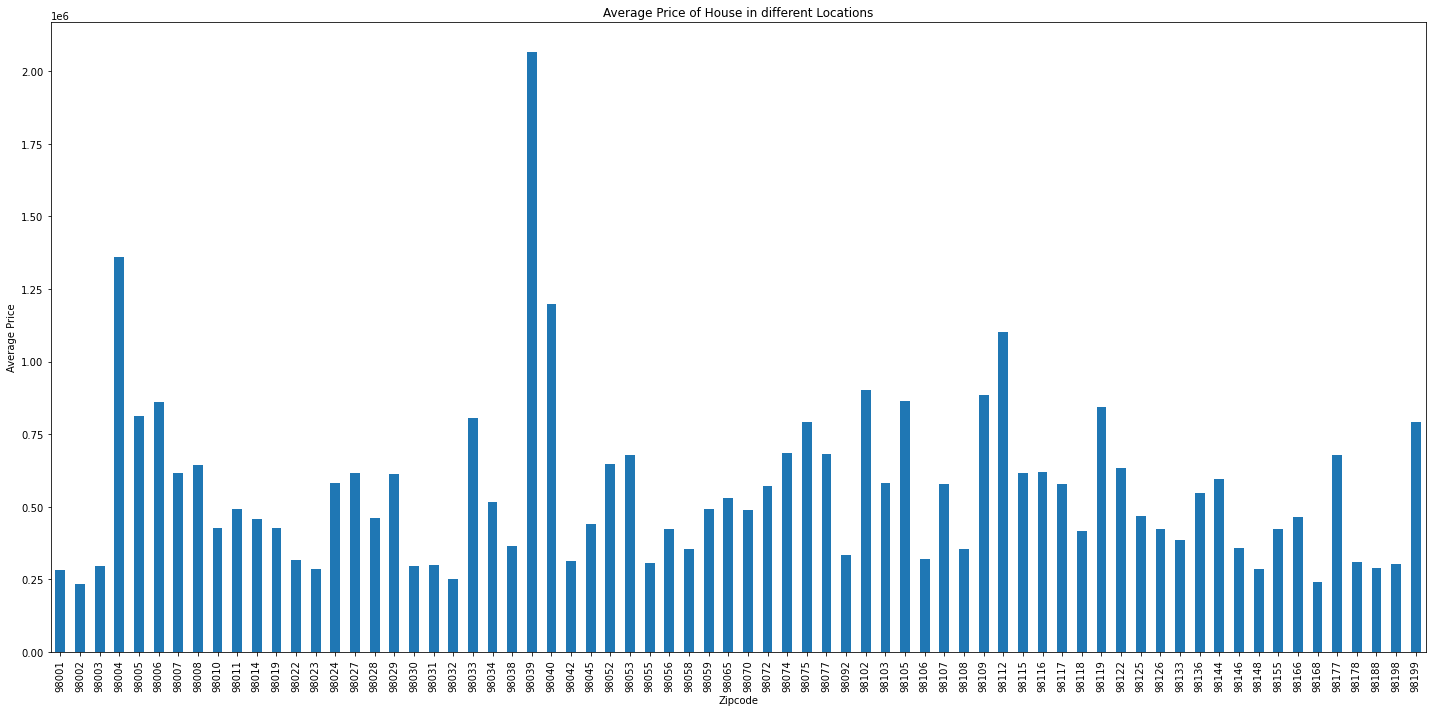

In [34]:
group_zip = df_eda.groupby('Zipcode')['Price'].mean()
group_zip.plot.bar(figsize=(20,10))
plt.ylabel('Average Price')
plt.title('Average Price of House in different Locations')
plt.tight_layout()

## Bivariate Analysis

In [35]:
def scatter(x1,y1,data):
    figure(figsize=(10, 7))
    sns.scatterplot(data[x1],data[y1])
    a, b = np.polyfit(data[x1],data[y1],1)
    x = np.array([0,max(data[x1])])
    y = a * x + b #a is slope and b is intercept (mx+c)
    plt.plot(x, y)

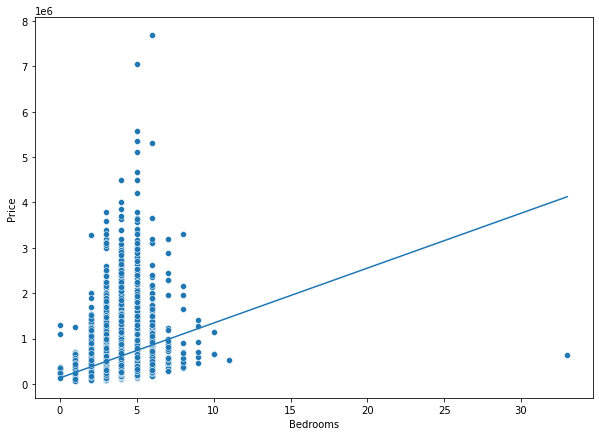

In [36]:
scatter('Bedrooms','Price',df_eda)

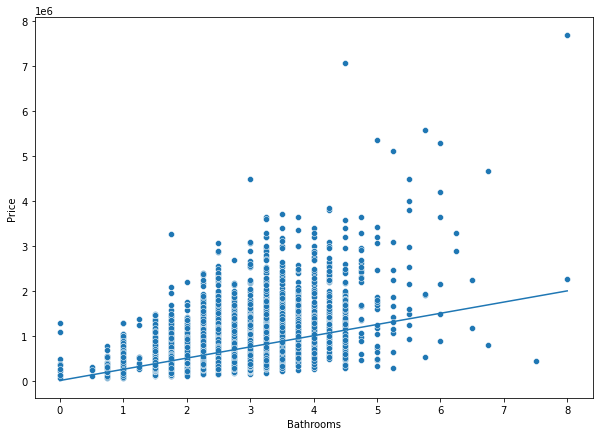

In [37]:
scatter('Bathrooms','Price',df_eda)

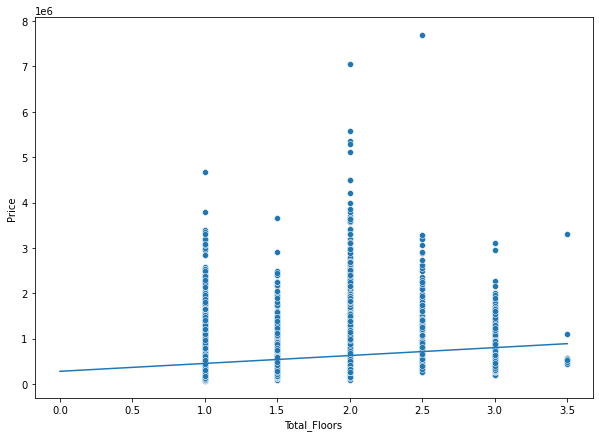

In [38]:
scatter('Total_Floors','Price',df_eda)

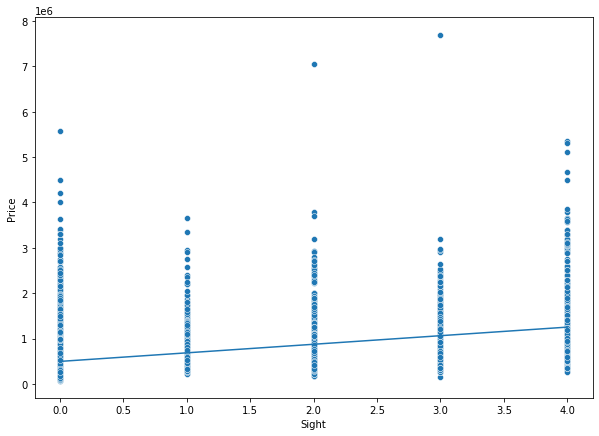

In [39]:
scatter('Sight','Price',df_eda)

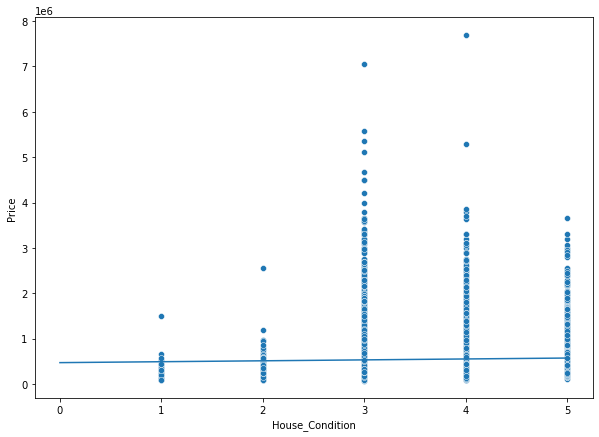

In [40]:
scatter('House_Condition','Price',df_eda)

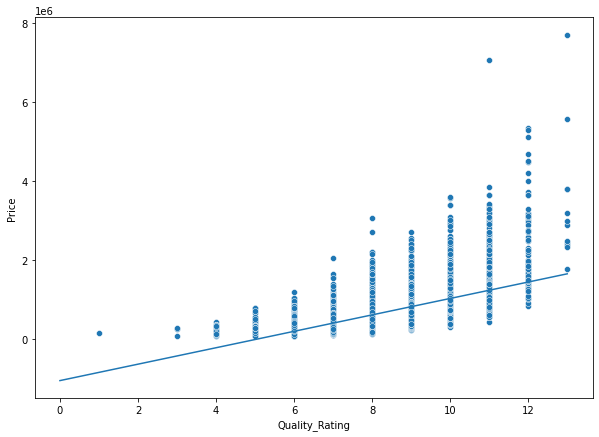

In [41]:
scatter('Quality_Rating','Price',df_eda)

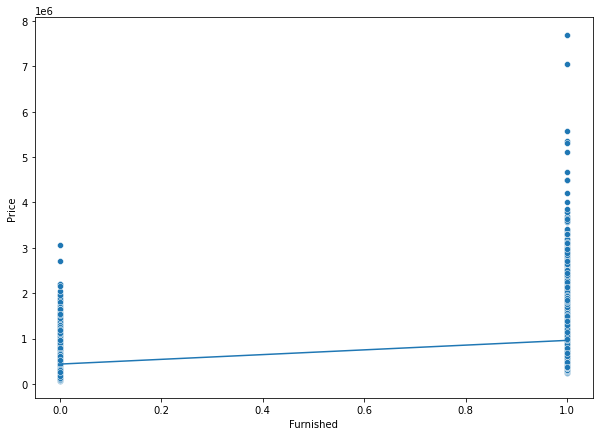

In [42]:
scatter('Furnished','Price',df_eda)

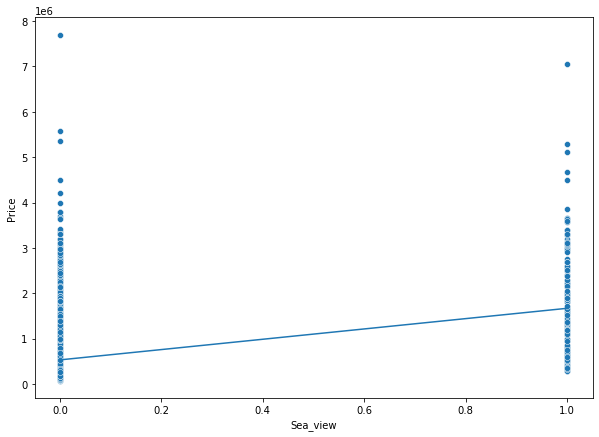

In [43]:
scatter('Sea_view','Price',df_eda)

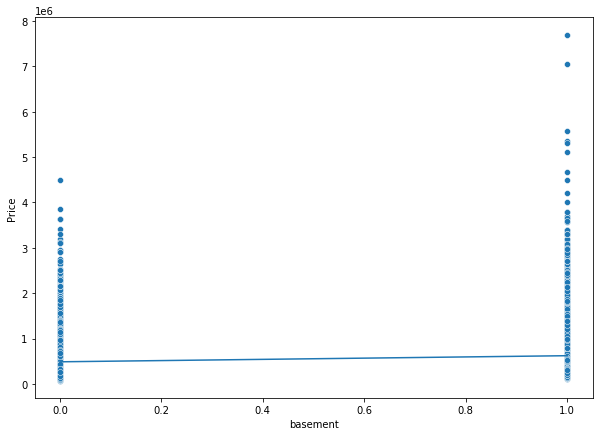

In [44]:
scatter('basement','Price',df_eda)

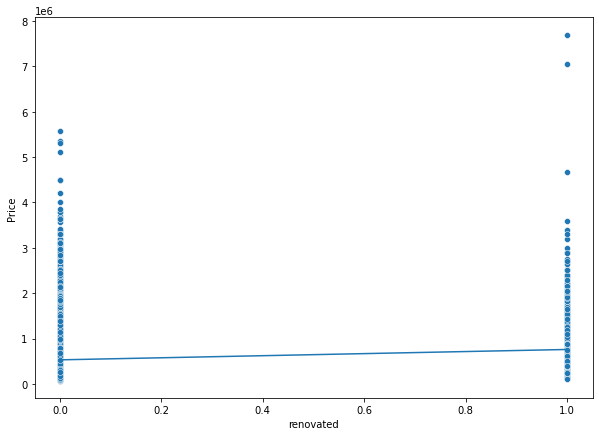

In [45]:
scatter('renovated','Price',df_eda)

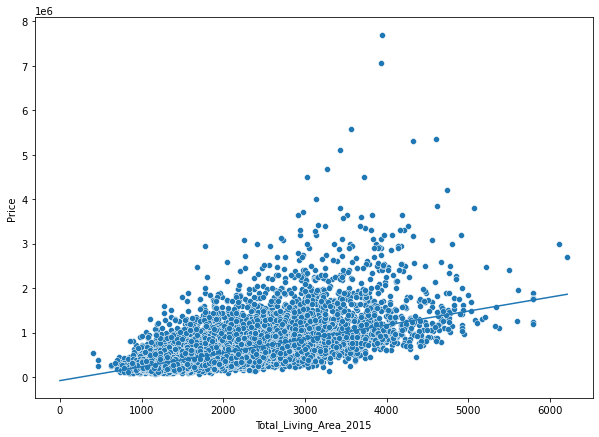

In [46]:
scatter('Total_Living_Area_2015','Price',df_eda)

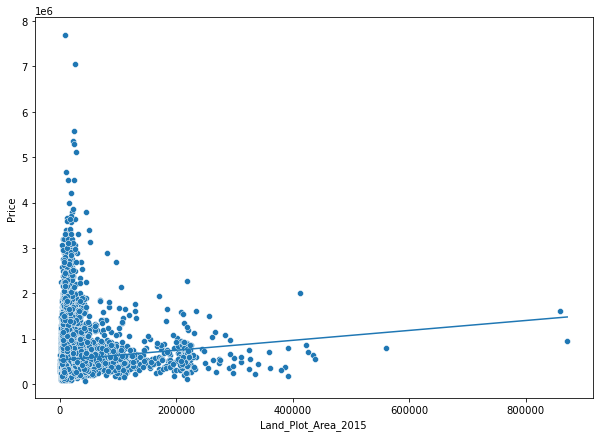

In [47]:
scatter('Land_Plot_Area_2015','Price',df_eda)

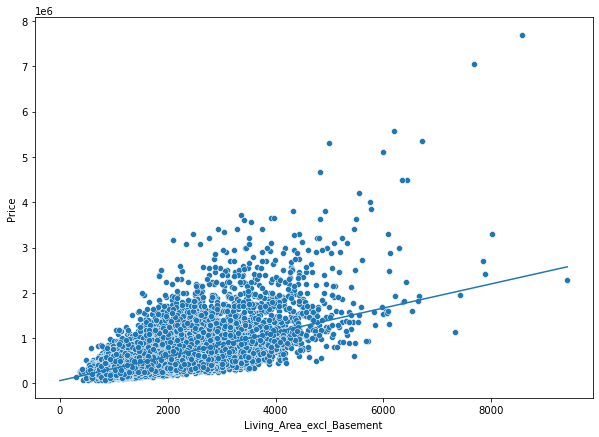

In [48]:
scatter('Living_Area_excl_Basement','Price',df_eda)

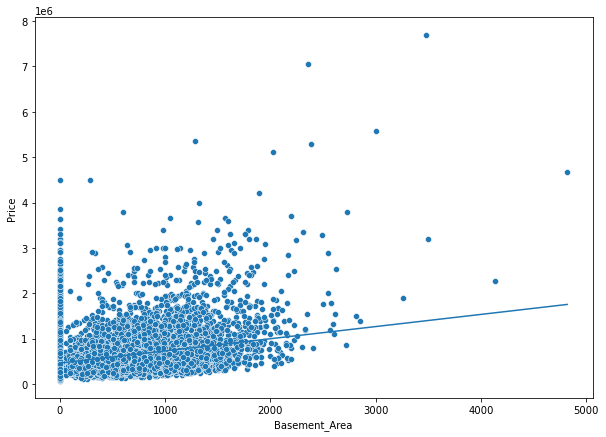

In [49]:
scatter('Basement_Area','Price',df_eda)

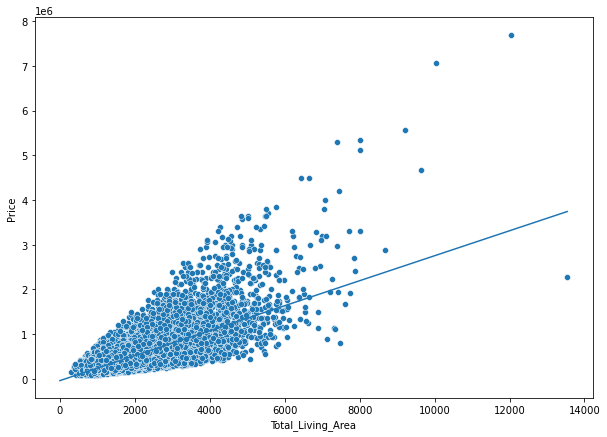

In [50]:
scatter('Total_Living_Area','Price',df_eda)

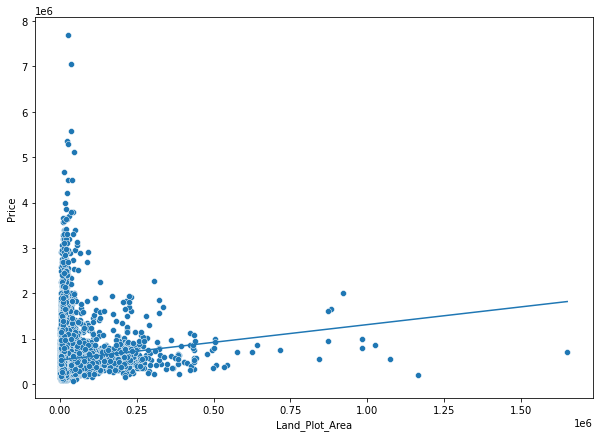

In [51]:
scatter('Land_Plot_Area','Price',df_eda)

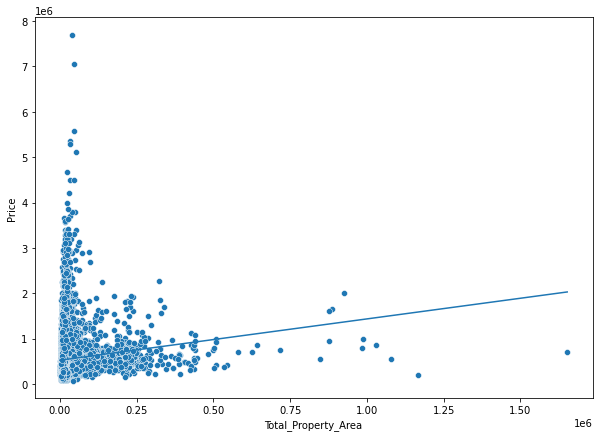

In [52]:
scatter('Total_Property_Area','Price',df_eda)

## Correlation Plot

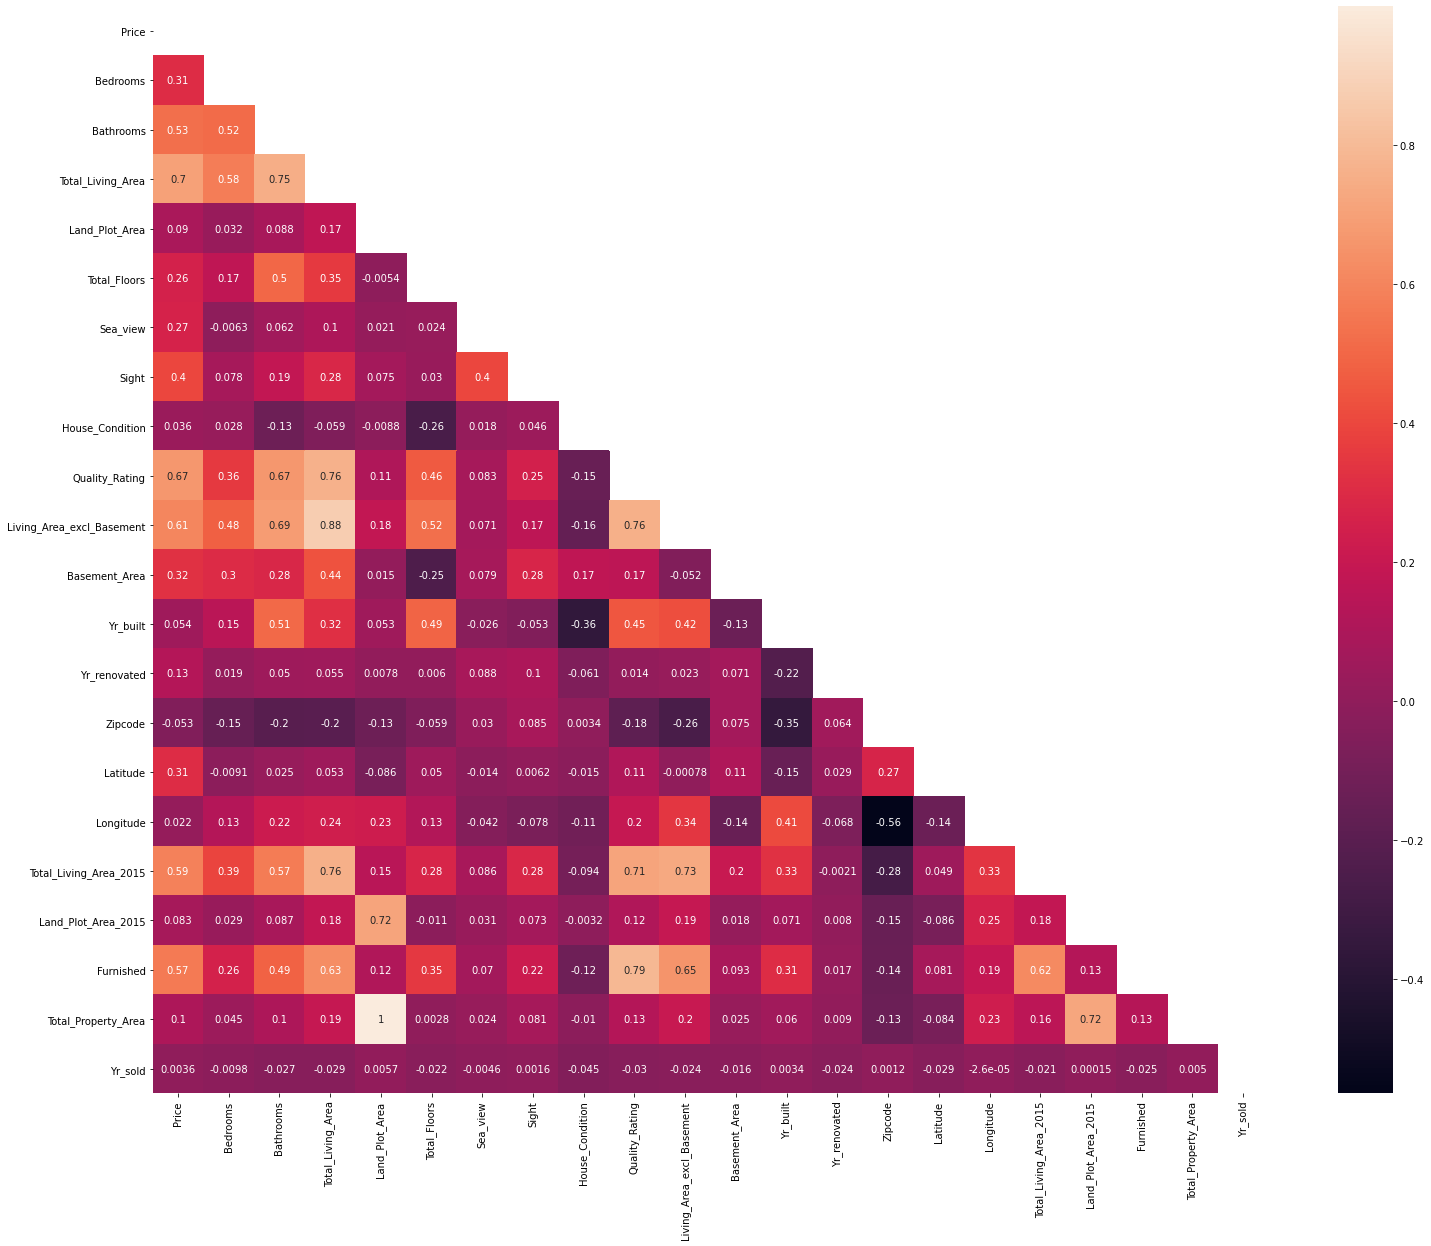

In [53]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool)) #masks upper triangle
fig = plt.subplots(figsize=(25, 20))
sns.heatmap(corr, annot=True,mask=mask)
plt.show()

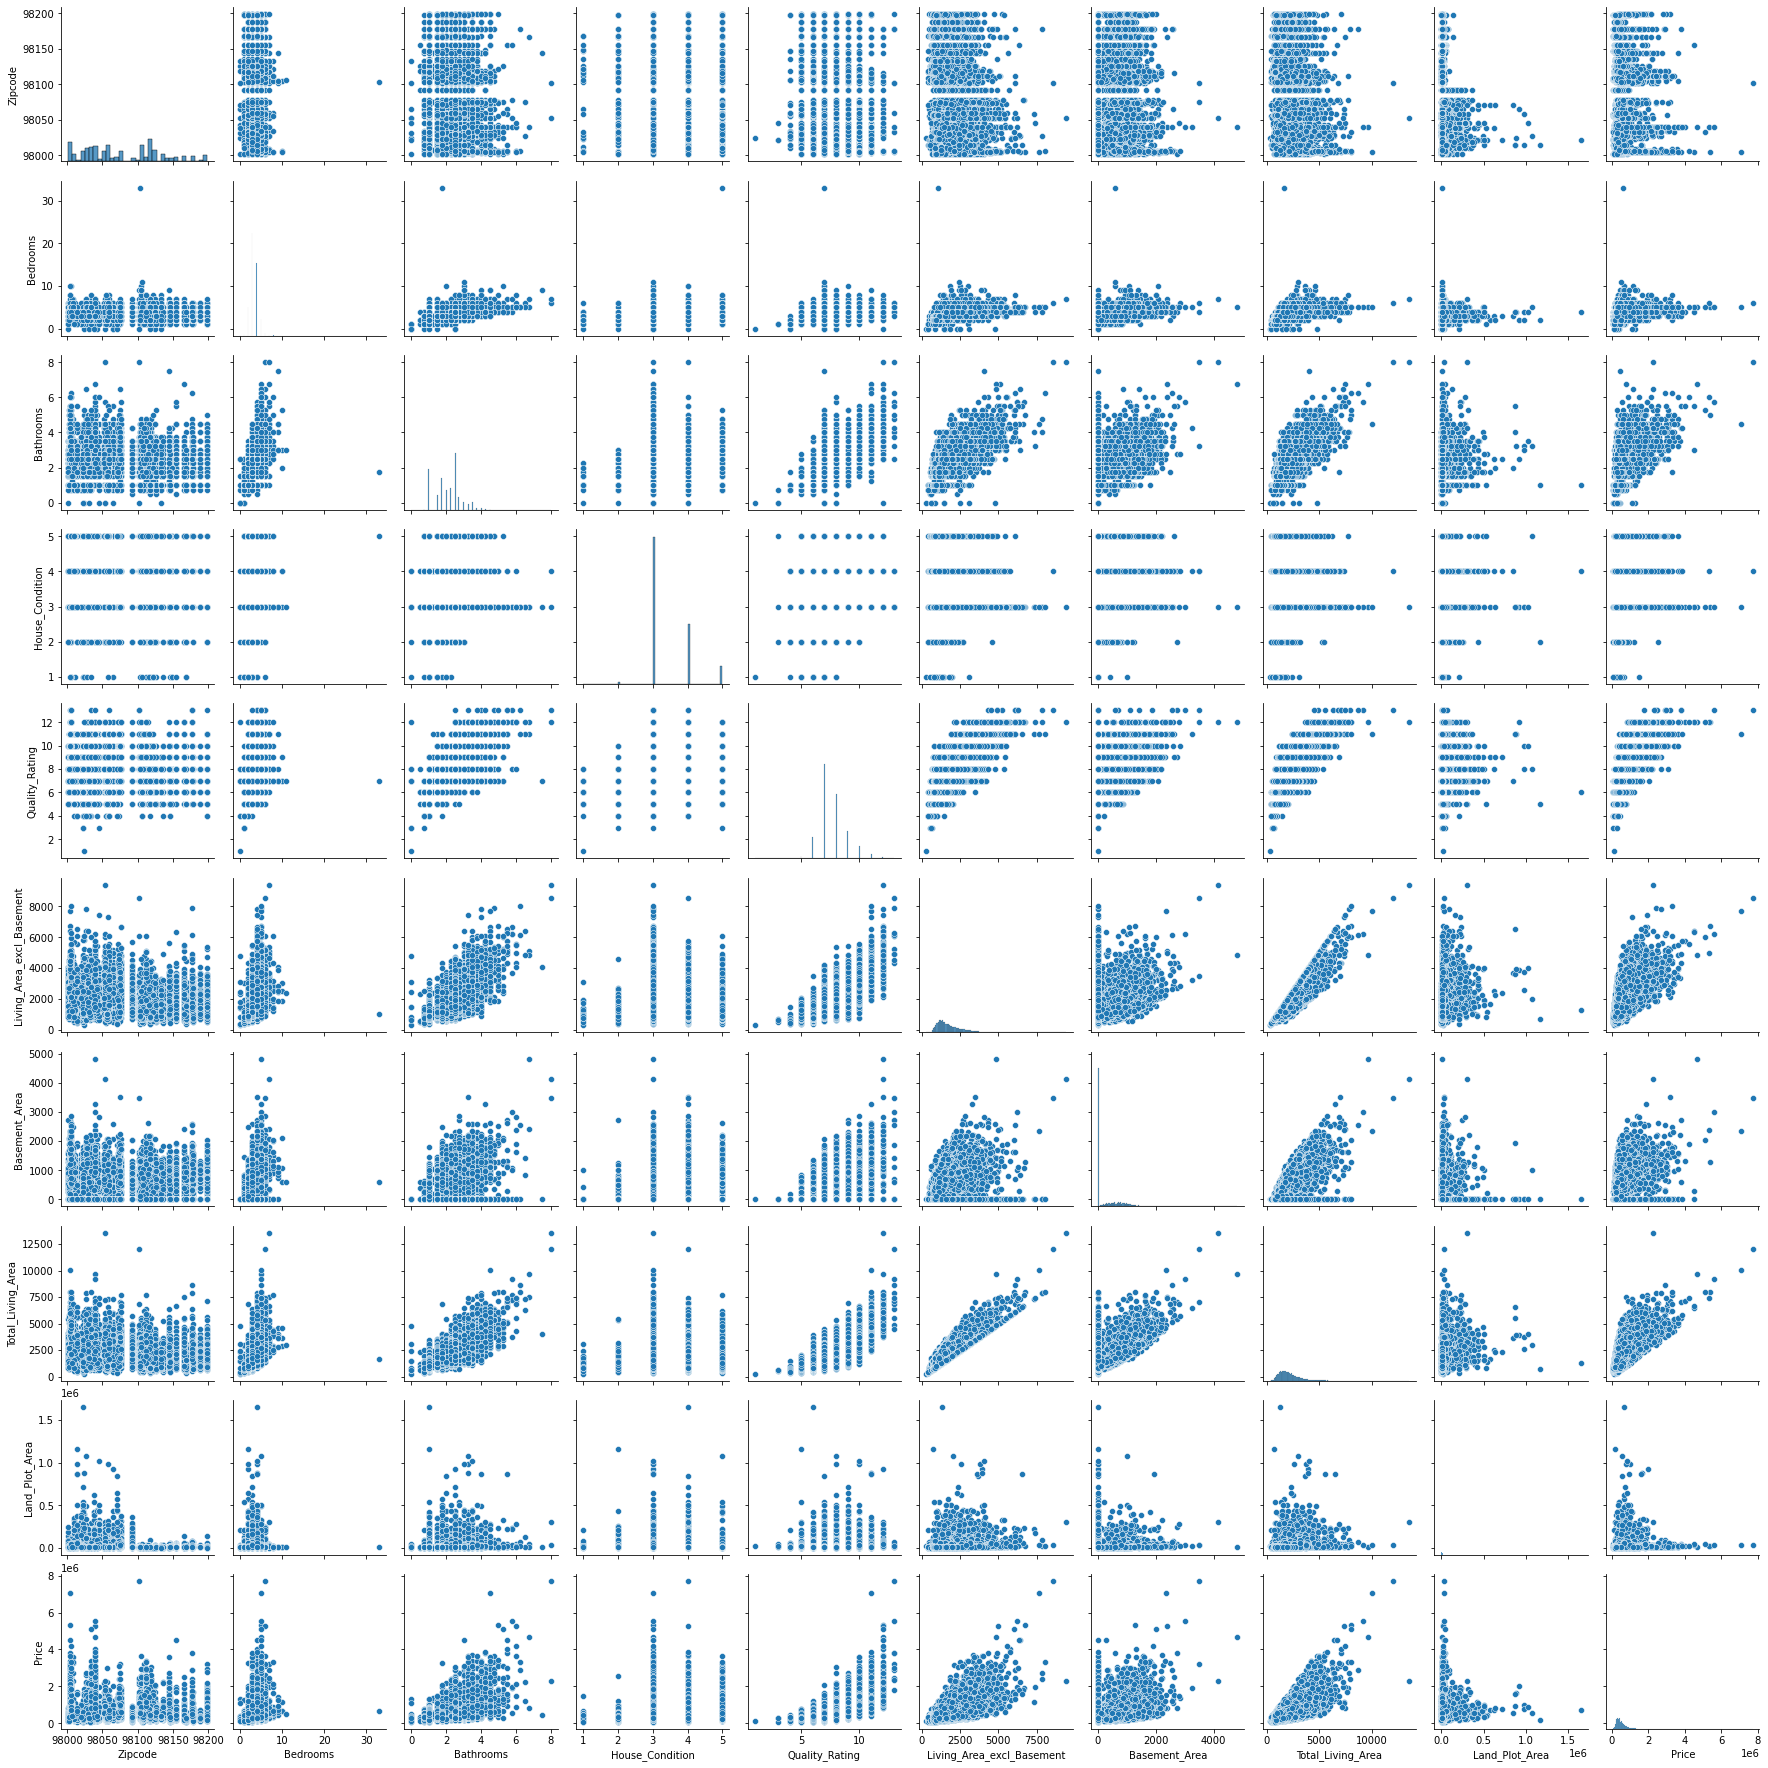

In [54]:
dfpair=df_eda[['Zipcode','Bedrooms','Bathrooms','House_Condition','Quality_Rating','Living_Area_excl_Basement','Basement_Area','Total_Living_Area','Land_Plot_Area','Price']]
sns.pairplot(dfpair)

## Missing Data Treatment

In [55]:
df.isna().sum().sum()

864

In [56]:
df_copy=df.copy()
df_copy['Total_Property_Area'].fillna(df_copy.Land_Plot_Area + df_copy.Total_Living_Area, inplace = True)
df_copy['Land_Plot_Area'].fillna(df_copy.Total_Property_Area - df_copy.Total_Living_Area, inplace = True)
df_copy['Total_Living_Area'].fillna(df_copy.Total_Property_Area - df_copy.Land_Plot_Area, inplace = True)
df_copy['Bathrooms'].fillna(df_copy['Bathrooms'].median(), inplace = True)
#df_copy['Bedrooms'].fillna(df_copy['Bedrooms'].median(), inplace = True)
df_copy['Total_Floors'].fillna(df_copy['Total_Floors'].mode()[0], inplace = True)
#df_copy['Sight'].fillna(df_copy['Sight'].mode()[0], inplace = True)
#df_copy['Sea_view'].fillna(df_copy['Sea_view'].mode()[0], inplace = True)
#df_copy['Furnished'].fillna(df_copy['Furnished'].mode()[0], inplace = True)
#df_copy['Yr_built'].fillna(df_copy['Yr_built'].mode()[0], inplace = True)

#Remove missing values for Basement_Area,Quality_Rating and Living_Area_excl_Basement
df_copy.drop(df_copy.index[21226], inplace=True)
print(df_copy.isnull().sum().sort_values(ascending=False))



Total_Living_Area_2015       166
Bedrooms                     108
House_Condition               84
Sight                         56
Longitude                     34
Sea_view                      30
Furnished                     29
Land_Plot_Area_2015           29
Yr_built                      14
Price                          0
Zipcode                        0
Total_Property_Area            0
Latitude                       0
Basement_Area                  0
Yr_renovated                   0
Living_Area_excl_Basement      0
Quality_Rating                 0
Total_Floors                   0
Land_Plot_Area                 0
Total_Living_Area              0
Bathrooms                      0
Yr_sold                        0
dtype: int64


In [57]:
#X = df_copy.drop('Price', axis = 1)
#Y = df_copy['Price']

#Scaling
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaled_X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
#df_concat = pd.concat([scaled_X, Y], axis = 1)

#KNN Imputer for Imputing missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=200)
df_imputed = pd.DataFrame(imputer.fit_transform(df_copy), columns = df_copy.columns)

In [58]:
df_imputed.isna().sum().sum()

0

In [59]:
df_imputed.Yr_built = df_imputed.Yr_built.round()
df_imputed.Total_Living_Area_2015 = df_imputed.Total_Living_Area_2015.round()
df_imputed.House_Condition = df_imputed.House_Condition.round()
df_imputed.Land_Plot_Area_2015 = df_imputed.Land_Plot_Area_2015.round()
df_imputed.Bedrooms = df_imputed.Bedrooms.round()
df_imputed.Sight = df_imputed.Sight.round()
df_imputed.Sea_view = df_imputed.Sea_view.round()
df_imputed.Furnished = df_imputed.Furnished.round()


In [60]:
df_imputed.columns

Index(['Price', 'Bedrooms', 'Bathrooms', 'Total_Living_Area', 'Land_Plot_Area',
       'Total_Floors', 'Sea_view', 'Sight', 'House_Condition',
       'Quality_Rating', 'Living_Area_excl_Basement', 'Basement_Area',
       'Yr_built', 'Yr_renovated', 'Zipcode', 'Latitude', 'Longitude',
       'Total_Living_Area_2015', 'Land_Plot_Area_2015', 'Furnished',
       'Total_Property_Area', 'Yr_sold'],
      dtype='object')

In [61]:
df_imputed=df_imputed[['Yr_built','Yr_renovated','Yr_sold','Latitude','Longitude','Zipcode','Bedrooms','Bathrooms','Total_Floors',
                       'Sea_view','Furnished','House_Condition','Quality_Rating','Sight','Total_Living_Area_2015',
                       'Land_Plot_Area_2015','Living_Area_excl_Basement','Basement_Area','Total_Living_Area','Land_Plot_Area',
                       'Total_Property_Area','Price']]

In [62]:
df_imputed.head()

,Yr_built,Yr_renovated,Yr_sold,Latitude,Longitude,Zipcode,Bedrooms,Bathrooms,Total_Floors,Sea_view,...,Quality_Rating,Sight,Total_Living_Area_2015,Land_Plot_Area_2015,Living_Area_excl_Basement,Basement_Area,Total_Living_Area,Land_Plot_Area,Total_Property_Area,Price
0,1966.0,0.0,2015.0,47.7228,-122.183,98034.0,4.0,1.75,1.0,0.0,...,8.0,0.0,2020.0,8660.0,1800.0,1250.0,3050.0,9440.0,12490.0,600000.0
1,1948.0,0.0,2015.0,47.5546,-122.274,98118.0,2.0,1.00,1.0,0.0,...,6.0,0.0,1660.0,4100.0,670.0,0.0,670.0,3101.0,3771.0,190000.0
2,1966.0,0.0,2014.0,47.5188,-122.256,98118.0,4.0,2.75,2.0,1.0,...,8.0,4.0,2620.0,2433.0,3040.0,0.0,3040.0,2415.0,5455.0,735000.0
3,2009.0,0.0,2014.0,47.3363,-122.213,98002.0,3.0,2.50,2.0,0.0,...,8.0,0.0,2030.0,3794.0,1740.0,0.0,1740.0,3721.0,5461.0,257000.0
4,1924.0,0.0,2015.0,47.5663,-122.285,98118.0,2.0,1.00,1.0,0.0,...,7.0,0.0,1120.0,5100.0,1120.0,0.0,1120.0,4590.0,5710.0,450000.0


In [63]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612 entries, 0 to 21611
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Yr_built                   21612 non-null  float64
 1   Yr_renovated               21612 non-null  float64
 2   Yr_sold                    21612 non-null  float64
 3   Latitude                   21612 non-null  float64
 4   Longitude                  21612 non-null  float64
 5   Zipcode                    21612 non-null  float64
 6   Bedrooms                   21612 non-null  float64
 7   Bathrooms                  21612 non-null  float64
 8   Total_Floors               21612 non-null  float64
 9   Sea_view                   21612 non-null  float64
 10  Furnished                  21612 non-null  float64
 11  House_Condition            21612 non-null  float64
 12  Quality_Rating             21612 non-null  float64
 13  Sight                      21612 non-null  flo

In [64]:
dfc=df_imputed.copy()
dfc['Basement_Present'] = dfc['Basement_Area'].apply(lambda x: 1 if x > 0 else 0)
dfc['Is_renovated'] = dfc['Yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

dfc.drop('Basement_Area',axis=1,inplace=True)
dfc.drop('Yr_renovated',axis=1,inplace=True)
dfc.drop('Total_Property_Area',axis=1,inplace=True)


dfc=dfc[['Yr_built','Yr_sold','Latitude','Longitude','Zipcode','Bedrooms','Bathrooms','Total_Floors','Basement_Present',
         'Is_renovated','Sea_view','Furnished','House_Condition','Quality_Rating','Sight','Total_Living_Area_2015',
         'Land_Plot_Area_2015','Living_Area_excl_Basement','Total_Living_Area','Land_Plot_Area','Price']]

In [65]:
dfc.Yr_built=dfc.Yr_built.astype('int64')
dfc.Yr_sold=dfc.Yr_sold.astype('int64')
dfc.Zipcode=dfc.Zipcode.astype('int64')
dfc.Bedrooms=dfc.Bedrooms.astype('object')
dfc.Bathrooms=dfc.Bathrooms.astype('object')
dfc.Total_Floors=dfc.Total_Floors.astype('object')
dfc.Basement_Present=dfc.Basement_Present.astype('object')
dfc.Is_renovated=dfc.Is_renovated.astype('object')
dfc.Sea_view=dfc.Sea_view.astype('object')
dfc.Furnished=dfc.Furnished.astype('object')
dfc.House_Condition=dfc.House_Condition.astype('object')
dfc.Quality_Rating=dfc.Quality_Rating.astype('object')
dfc.Sight=dfc.Sight.astype('object')
dfc.Total_Living_Area_2015=dfc.Total_Living_Area_2015.astype('int64')
dfc.Land_Plot_Area_2015=dfc.Land_Plot_Area_2015.astype('int64')
dfc.Living_Area_excl_Basement=dfc.Living_Area_excl_Basement.astype('int64')
dfc.Total_Living_Area=dfc.Total_Living_Area.astype('int64')
dfc.Land_Plot_Area=dfc.Land_Plot_Area.astype('int64')
dfc.Price=dfc.Price.astype('int64')
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612 entries, 0 to 21611
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Yr_built                   21612 non-null  int64  
 1   Yr_sold                    21612 non-null  int64  
 2   Latitude                   21612 non-null  float64
 3   Longitude                  21612 non-null  float64
 4   Zipcode                    21612 non-null  int64  
 5   Bedrooms                   21612 non-null  object 
 6   Bathrooms                  21612 non-null  object 
 7   Total_Floors               21612 non-null  object 
 8   Basement_Present           21612 non-null  object 
 9   Is_renovated               21612 non-null  object 
 10  Sea_view                   21612 non-null  object 
 11  Furnished                  21612 non-null  object 
 12  House_Condition            21612 non-null  object 
 13  Quality_Rating             21612 non-null  obj

In [66]:
dfc.head()

,Yr_built,Yr_sold,Latitude,Longitude,Zipcode,Bedrooms,Bathrooms,Total_Floors,Basement_Present,Is_renovated,...,Furnished,House_Condition,Quality_Rating,Sight,Total_Living_Area_2015,Land_Plot_Area_2015,Living_Area_excl_Basement,Total_Living_Area,Land_Plot_Area,Price
0,1966,2015,47.7228,-122.183,98034,4.0,1.75,1.0,1,0,...,0.0,3.0,8.0,0.0,2020,8660,1800,3050,9440,600000
1,1948,2015,47.5546,-122.274,98118,2.0,1.0,1.0,0,0,...,0.0,4.0,6.0,0.0,1660,4100,670,670,3101,190000
2,1966,2014,47.5188,-122.256,98118,4.0,2.75,2.0,0,0,...,0.0,3.0,8.0,4.0,2620,2433,3040,3040,2415,735000
3,2009,2014,47.3363,-122.213,98002,3.0,2.5,2.0,0,0,...,0.0,3.0,8.0,0.0,2030,3794,1740,1740,3721,257000
4,1924,2015,47.5663,-122.285,98118,2.0,1.0,1.0,0,0,...,0.0,3.0,7.0,0.0,1120,5100,1120,1120,4590,450000


### Creating Dummies

In [67]:
dummy=pd.get_dummies(dfc,drop_first=True)
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612 entries, 0 to 21611
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Yr_built                   21612 non-null  int64  
 1   Yr_sold                    21612 non-null  int64  
 2   Latitude                   21612 non-null  float64
 3   Longitude                  21612 non-null  float64
 4   Zipcode                    21612 non-null  int64  
 5   Total_Living_Area_2015     21612 non-null  int64  
 6   Land_Plot_Area_2015        21612 non-null  int64  
 7   Living_Area_excl_Basement  21612 non-null  int64  
 8   Total_Living_Area          21612 non-null  int64  
 9   Land_Plot_Area             21612 non-null  int64  
 10  Price                      21612 non-null  int64  
 11  Bedrooms_1.0               21612 non-null  uint8  
 12  Bedrooms_2.0               21612 non-null  uint8  
 13  Bedrooms_3.0               21612 non-null  uin

### Train Validate and Test set split

In [68]:
x = dummy.drop(columns='Price')
y = dummy.Price

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(13831, 79)
(3458, 79)
(4323, 79)


## Model Building

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Linear Regression

In [70]:
LR = LinearRegression()
LR.fit(X_train, y_train)
#predicting result over validation data
y_LR_predtr= LR.predict(X_train)
y_LR_predvl= LR.predict(X_val)
y_LR_predts= LR.predict(X_test)

print(LR.coef_)

#train set
LR_trscore=r2_score(y_train,y_LR_predtr)
LR_trRMSE=np.sqrt(mean_squared_error(y_train, y_LR_predtr))
LR_trMSE=mean_squared_error(y_train, y_LR_predtr)
LR_trMAE=mean_absolute_error(y_train, y_LR_predtr)
#validation set
LR_vlscore=r2_score(y_val,y_LR_predvl)
LR_vlRMSE=np.sqrt(mean_squared_error(y_val, y_LR_predvl))
LR_vlMSE=mean_squared_error(y_val, y_LR_predvl)
LR_vlMAE=mean_absolute_error(y_val, y_LR_predvl)

Scoredf=pd.DataFrame({'Method':['Linear Regression'],'Train Set Score':LR_trscore,'Train RMSE': LR_trRMSE, 'Train MSE': LR_trMSE, 'Train MAE': LR_trMAE, 'Validation Set Score':LR_vlscore,'VL RMSE': LR_vlRMSE, 'VL MSE': LR_vlMSE, 'VL MAE': LR_vlMAE})
Scoredf

[-1.93724235e+03  2.57962608e+04  6.05535460e+05 -1.97408656e+05
 -6.18962478e+02  4.07189012e+01 -4.75782216e-01  1.49751716e+01
  1.19494705e+02  1.81049693e-01  8.08346678e+04  9.19655697e+04
  7.31631702e+04  4.94685334e+04  3.14874035e+04 -1.14195861e+04
  5.09597355e+03  3.51554082e+04 -5.63880748e+04 -1.25934171e+05
 -1.80944848e+05  4.77302819e-09 -1.22003476e+05 -3.09876771e+04
 -9.81045834e+03 -3.15693457e+04 -9.62511829e+03 -1.63162386e+04
 -3.98830742e+03 -5.55433748e+03 -1.66048676e+04 -3.28950458e+03
  2.08244474e+04  7.42339473e+04  4.10423124e+04  1.39220316e+05
  9.00864680e+04  2.58917361e+05  1.94696113e+05  3.32115643e+05
  3.02849704e+05  4.97639168e+05  5.33682557e+05  1.01285728e+06
  9.05122811e+05  1.50712627e+06  2.15671155e+04  2.57292252e+05
 -6.70824022e+04  1.51339918e-09  3.71682169e+06  1.39869620e+04
  2.89748302e+04  1.61603676e+05  7.99813485e+04  4.03478364e+05
  1.85981624e+04  7.52865327e+04  6.16487163e+05  1.38761664e+05
  4.59252211e+04  5.52350

,Method,Train Set Score,Train RMSE,Train MSE,Train MAE,Validation Set Score,VL RMSE,VL MSE,VL MAE
0,Linear Regression,0.751173,185664.026107,3.447113e+10,117361.679541,0.721593,176957.79812,3.131406e+10,115768.905263


### Ridge Regression

In [71]:
from sklearn.linear_model import Ridge

Ridge = Ridge()
Ridge.fit(X_train, y_train)

#predicting result over test data
y_Ridge_predtr= Ridge.predict(X_train)
y_Ridge_predvl= Ridge.predict(X_val)
y_Ridge_predts= Ridge.predict(X_test)

#train set
Ridge_trscore=r2_score(y_train,y_Ridge_predtr)
Ridge_trRMSE=np.sqrt(mean_squared_error(y_train, y_Ridge_predtr))
Ridge_trMSE=mean_squared_error(y_train, y_Ridge_predtr)
Ridge_trMAE=mean_absolute_error(y_train, y_Ridge_predtr)
#validation set
Ridge_vlscore=r2_score(y_val,y_Ridge_predvl)
Ridge_vlRMSE=np.sqrt(mean_squared_error(y_val, y_Ridge_predvl))
Ridge_vlMSE=mean_squared_error(y_val, y_Ridge_predvl)
Ridge_vlMAE=mean_absolute_error(y_val, y_Ridge_predvl)

Ridgedf=pd.DataFrame({'Method':['Ridge'],'Train Set Score':Ridge_trscore,'Train RMSE': Ridge_trRMSE, 'Train MSE': Ridge_trMSE, 'Train MAE': Ridge_trMAE, 'Validation Set Score':Ridge_vlscore,'VL RMSE': Ridge_vlRMSE, 'VL MSE': Ridge_vlMSE, 'VL MAE': Ridge_vlMAE})
Scoredf= pd.concat([Scoredf, Ridgedf])
Scoredf

,Method,Train Set Score,Train RMSE,Train MSE,Train MAE,Validation Set Score,VL RMSE,VL MSE,VL MAE
0,Linear Regression,0.751173,185664.026107,3.447113e+10,117361.679541,0.721593,176957.798120,3.131406e+10,115768.905263
0,Ridge,0.749045,186456.303420,3.476595e+10,118055.009869,0.720131,177421.823055,3.147850e+10,116283.410487


In [72]:
Ridgedf

,Method,Train Set Score,Train RMSE,Train MSE,Train MAE,Validation Set Score,VL RMSE,VL MSE,VL MAE
0,Ridge,0.749045,186456.30342,3.476595e+10,118055.009869,0.720131,177421.823055,3.147850e+10,116283.410487


### Lasso Regression

In [73]:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso.fit(X_train, y_train)

#predicting result over test data
y_Lasso_predtr= Lasso.predict(X_train)
y_Lasso_predvl= Lasso.predict(X_val)
y_Lasso_predts= Lasso.predict(X_test)

#train set
Lasso_trscore=r2_score(y_train,y_Lasso_predtr)
Lasso_trRMSE=np.sqrt(mean_squared_error(y_train, y_Lasso_predtr))
Lasso_trMSE=mean_squared_error(y_train, y_Lasso_predtr)
Lasso_trMAE=mean_absolute_error(y_train, y_Lasso_predtr)
#validation set
Lasso_vlscore=r2_score(y_val,y_Lasso_predvl)
Lasso_vlRMSE=np.sqrt(mean_squared_error(y_val, y_Lasso_predvl))
Lasso_vlMSE=mean_squared_error(y_val, y_Lasso_predvl)
Lasso_vlMAE=mean_absolute_error(y_val, y_Lasso_predvl)

Lassodf=pd.DataFrame({'Method':['Lasso'],'Train Set Score':Lasso_trscore,'Train RMSE': Lasso_trRMSE, 'Train MSE': Lasso_trMSE, 'Train MAE': Lasso_trMAE, 'Validation Set Score':Lasso_vlscore,'VL RMSE': Lasso_vlRMSE, 'VL MSE': Lasso_vlMSE, 'VL MAE': Lasso_vlMAE})
Scoredf= pd.concat([Scoredf, Lassodf])
Scoredf

,Method,Train Set Score,Train RMSE,Train MSE,Train MAE,Validation Set Score,VL RMSE,VL MSE,VL MAE
0,Linear Regression,0.751173,185664.026107,3.447113e+10,117361.679541,0.721593,176957.798120,3.131406e+10,115768.905263
0,Ridge,0.749045,186456.303420,3.476595e+10,118055.009869,0.720131,177421.823055,3.147850e+10,116283.410487
0,Lasso,0.751169,185665.278806,3.447160e+10,117375.103487,0.721644,176941.666360,3.130835e+10,115759.005645


In [74]:
Lassodf

,Method,Train Set Score,Train RMSE,Train MSE,Train MAE,Validation Set Score,VL RMSE,VL MSE,VL MAE
0,Lasso,0.751169,185665.278806,3.447160e+10,117375.103487,0.721644,176941.66636,3.130835e+10,115759.005645


### KNN

In [75]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

#predicting result over test data
y_knn_predtr= knn.predict(X_train)
y_knn_predvl= knn.predict(X_val)
y_knn_predts= knn.predict(X_test)

#train set
knn_trscore=r2_score(y_train,y_knn_predtr)
knn_trRMSE=np.sqrt(mean_squared_error(y_train, y_knn_predtr))
knn_trMSE=mean_squared_error(y_train, y_knn_predtr)
knn_trMAE=mean_absolute_error(y_train, y_knn_predtr)
#validation set
knn_vlscore=r2_score(y_val,y_knn_predvl)
knn_vlRMSE=np.sqrt(mean_squared_error(y_val, y_knn_predvl))
knn_vlMSE=mean_squared_error(y_val, y_knn_predvl)
knn_vlMAE=mean_absolute_error(y_val, y_knn_predvl)

KNNdf=pd.DataFrame({'Method':['KNN'],'Train Set Score':knn_trscore,'Train RMSE': knn_trRMSE, 'Train MSE': knn_trMSE, 'Train MAE': knn_trMAE, 'Validation Set Score':knn_vlscore,'VL RMSE': knn_vlRMSE, 'VL MSE': knn_vlMSE, 'VL MAE': knn_vlMAE})
Scoredf= pd.concat([Scoredf, KNNdf])
Scoredf

,Method,Train Set Score,Train RMSE,Train MSE,Train MAE,Validation Set Score,VL RMSE,VL MSE,VL MAE
0,Linear Regression,0.751173,185664.026107,3.447113e+10,117361.679541,0.721593,176957.798120,3.131406e+10,115768.905263
0,Ridge,0.749045,186456.303420,3.476595e+10,118055.009869,0.720131,177421.823055,3.147850e+10,116283.410487
0,Lasso,0.751169,185665.278806,3.447160e+10,117375.103487,0.721644,176941.666360,3.130835e+10,115759.005645
0,KNN,0.671921,213190.486652,4.545018e+10,129999.899646,0.467299,244777.502791,5.991603e+10,157857.102603


In [76]:
KNNdf

,Method,Train Set Score,Train RMSE,Train MSE,Train MAE,Validation Set Score,VL RMSE,VL MSE,VL MAE
0,KNN,0.671921,213190.486652,4.545018e+10,129999.899646,0.467299,244777.502791,5.991603e+10,157857.102603


### Decision Tree

In [77]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

y_DT_predtr= DT.predict(X_train)
y_DT_predvl= DT.predict(X_val)
y_DT_predts= DT.predict(X_test)

#train set
DT_trscore=r2_score(y_train,y_DT_predtr)
DT_trRMSE=np.sqrt(mean_squared_error(y_train, y_DT_predtr))
DT_trMSE=mean_squared_error(y_train, y_DT_predtr)
DT_trMAE=mean_absolute_error(y_train, y_DT_predtr)
#validation set
DT_vlscore=r2_score(y_val,y_DT_predvl)
DT_vlRMSE=np.sqrt(mean_squared_error(y_val, y_DT_predvl))
DT_vlMSE=mean_squared_error(y_val, y_DT_predvl)
DT_vlMAE=mean_absolute_error(y_val, y_DT_predvl)

DTdf=pd.DataFrame({'Method':['Decision Tree'],'Train Set Score':DT_trscore,'Train RMSE': DT_trRMSE, 'Train MSE': DT_trMSE, 'Train MAE': DT_trMAE, 'Validation Set Score':DT_vlscore,'VL RMSE': DT_vlRMSE, 'VL MSE': DT_vlMSE, 'VL MAE': DT_vlMAE})
Scoredf= pd.concat([Scoredf, DTdf])
Scoredf

,Method,Train Set Score,Train RMSE,Train MSE,Train MAE,Validation Set Score,VL RMSE,VL MSE,VL MAE
0,Linear Regression,0.751173,185664.026107,3.447113e+10,117361.679541,0.721593,176957.798120,3.131406e+10,115768.905263
0,Ridge,0.749045,186456.303420,3.476595e+10,118055.009869,0.720131,177421.823055,3.147850e+10,116283.410487
0,Lasso,0.751169,185665.278806,3.447160e+10,117375.103487,0.721644,176941.666360,3.130835e+10,115759.005645
0,KNN,0.671921,213190.486652,4.545018e+10,129999.899646,0.467299,244777.502791,5.991603e+10,157857.102603
0,Decision Tree,0.999965,2194.017175,4.813711e+06,71.669004,0.674258,191411.034334,3.663818e+10,101401.362493


In [78]:
DTdf

,Method,Train Set Score,Train RMSE,Train MSE,Train MAE,Validation Set Score,VL RMSE,VL MSE,VL MAE
0,Decision Tree,0.999965,2194.017175,4.813711e+06,71.669004,0.674258,191411.034334,3.663818e+10,101401.362493


## Ensemble Techniques

### Random Forest

In [79]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(X_train, y_train)

y_RF_predtr= RF.predict(X_train)
y_RF_predvl= RF.predict(X_val)
y_RF_predts= RF.predict(X_test)

#train set
RF_trscore=r2_score(y_train,y_RF_predtr)
RF_trRMSE=np.sqrt(mean_squared_error(y_train, y_RF_predtr))
RF_trMSE=mean_squared_error(y_train, y_RF_predtr)
RF_trMAE=mean_absolute_error(y_train, y_RF_predtr)
#validation set
RF_vlscore=r2_score(y_val,y_RF_predvl)
RF_vlRMSE=np.sqrt(mean_squared_error(y_val, y_RF_predvl))
RF_vlMSE=mean_squared_error(y_val, y_RF_predvl)
RF_vlMAE=mean_absolute_error(y_val, y_RF_predvl)

RFdf=pd.DataFrame({'Method':['Random Forest'],'Train Set Score':RF_trscore,'Train RMSE': RF_trRMSE, 'Train MSE': RF_trMSE, 'Train MAE': RF_trMAE, 'Validation Set Score':RF_vlscore,'VL RMSE': RF_vlRMSE, 'VL MSE': RF_vlMSE, 'VL MAE': RF_vlMAE})
Scoredf= pd.concat([Scoredf, RFdf])
Scoredf

,Method,Train Set Score,Train RMSE,Train MSE,Train MAE,Validation Set Score,VL RMSE,VL MSE,VL MAE
0,Linear Regression,0.751173,185664.026107,3.447113e+10,117361.679541,0.721593,176957.798120,3.131406e+10,115768.905263
0,Ridge,0.749045,186456.303420,3.476595e+10,118055.009869,0.720131,177421.823055,3.147850e+10,116283.410487
0,Lasso,0.751169,185665.278806,3.447160e+10,117375.103487,0.721644,176941.666360,3.130835e+10,115759.005645
0,KNN,0.671921,213190.486652,4.545018e+10,129999.899646,0.467299,244777.502791,5.991603e+10,157857.102603
0,Decision Tree,0.999965,2194.017175,4.813711e+06,71.669004,0.674258,191411.034334,3.663818e+10,101401.362493
0,Random Forest,0.982175,49693.283213,2.469422e+09,26077.542694,0.865172,123146.018483,1.516494e+10,69935.498197


In [80]:
RFdf

,Method,Train Set Score,Train RMSE,Train MSE,Train MAE,Validation Set Score,VL RMSE,VL MSE,VL MAE
0,Random Forest,0.982175,49693.283213,2.469422e+09,26077.542694,0.865172,123146.018483,1.516494e+10,69935.498197


### Bagging

In [81]:
from sklearn.ensemble import BaggingRegressor
BGG=BaggingRegressor()
BGG.fit(X_train, y_train)

y_BGG_predtr= BGG.predict(X_train)
y_BGG_predvl= BGG.predict(X_val)
y_BGG_predts= BGG.predict(X_test)
#train set
BGG_trscore=r2_score(y_train,y_BGG_predtr)
BGG_trRMSE=np.sqrt(mean_squared_error(y_train, y_BGG_predtr))
BGG_trMSE=mean_squared_error(y_train, y_BGG_predtr)
BGG_trMAE=mean_absolute_error(y_train, y_BGG_predtr)
#validation set
BGG_vlscore=r2_score(y_val,y_BGG_predvl)
BGG_vlRMSE=np.sqrt(mean_squared_error(y_val, y_BGG_predvl))
BGG_vlMSE=mean_squared_error(y_val, y_BGG_predvl)
BGG_vlMAE=mean_absolute_error(y_val, y_BGG_predvl)

BGGdf=pd.DataFrame({'Method':['Bagging'],'Train Set Score':BGG_trscore,'Train RMSE': BGG_trRMSE, 'Train MSE': BGG_trMSE, 'Train MAE': BGG_trMAE, 'Validation Set Score':BGG_vlscore,'VL RMSE': BGG_vlRMSE, 'VL MSE': BGG_vlMSE, 'VL MAE': BGG_vlMAE})
Scoredf= pd.concat([Scoredf, BGGdf])
Scoredf

,Method,Train Set Score,Train RMSE,Train MSE,Train MAE,Validation Set Score,VL RMSE,VL MSE,VL MAE
0,Linear Regression,0.751173,185664.026107,3.447113e+10,117361.679541,0.721593,176957.798120,3.131406e+10,115768.905263
0,Ridge,0.749045,186456.303420,3.476595e+10,118055.009869,0.720131,177421.823055,3.147850e+10,116283.410487
0,Lasso,0.751169,185665.278806,3.447160e+10,117375.103487,0.721644,176941.666360,3.130835e+10,115759.005645
0,KNN,0.671921,213190.486652,4.545018e+10,129999.899646,0.467299,244777.502791,5.991603e+10,157857.102603
0,Decision Tree,0.999965,2194.017175,4.813711e+06,71.669004,0.674258,191411.034334,3.663818e+10,101401.362493
0,Random Forest,0.982175,49693.283213,2.469422e+09,26077.542694,0.865172,123146.018483,1.516494e+10,69935.498197
0,Bagging,0.974003,60012.467284,3.601496e+09,30181.365515,0.848717,130444.045863,1.701565e+10,74111.952641


In [82]:
BGGdf

,Method,Train Set Score,Train RMSE,Train MSE,Train MAE,Validation Set Score,VL RMSE,VL MSE,VL MAE
0,Bagging,0.974003,60012.467284,3.601496e+09,30181.365515,0.848717,130444.045863,1.701565e+10,74111.952641


### AdaBoost

In [83]:
from sklearn.ensemble import AdaBoostRegressor

Ada=AdaBoostRegressor()
Ada.fit(X_train, y_train)

y_Ada_predtr= Ada.predict(X_train)
y_Ada_predvl= Ada.predict(X_val)
y_Ada_predts= Ada.predict(X_test)
#train set
Ada_trscore=r2_score(y_train,y_Ada_predtr)
Ada_trRMSE=np.sqrt(mean_squared_error(y_train, y_Ada_predtr))
Ada_trMSE=mean_squared_error(y_train, y_Ada_predtr)
Ada_trMAE=mean_absolute_error(y_train, y_Ada_predtr)
#validation set
Ada_vlscore=r2_score(y_val,y_Ada_predvl)
Ada_vlRMSE=np.sqrt(mean_squared_error(y_val, y_Ada_predvl))
Ada_vlMSE=mean_squared_error(y_val, y_Ada_predvl)
Ada_vlMAE=mean_absolute_error(y_val, y_Ada_predvl)

Adadf=pd.DataFrame({'Method':['AdaBoost'],'Train Set Score':Ada_trscore,'Train RMSE': Ada_trRMSE, 'Train MSE': Ada_trMSE, 'Train MAE': Ada_trMAE, 'Validation Set Score':Ada_vlscore,'VL RMSE': Ada_vlRMSE, 'VL MSE': Ada_vlMSE, 'VL MAE': Ada_vlMAE})
Scoredf= pd.concat([Scoredf, Adadf])
Scoredf

,Method,Train Set Score,Train RMSE,Train MSE,Train MAE,Validation Set Score,VL RMSE,VL MSE,VL MAE
0,Linear Regression,0.751173,185664.026107,3.447113e+10,117361.679541,0.721593,176957.798120,3.131406e+10,115768.905263
0,Ridge,0.749045,186456.303420,3.476595e+10,118055.009869,0.720131,177421.823055,3.147850e+10,116283.410487
0,Lasso,0.751169,185665.278806,3.447160e+10,117375.103487,0.721644,176941.666360,3.130835e+10,115759.005645
0,KNN,0.671921,213190.486652,4.545018e+10,129999.899646,0.467299,244777.502791,5.991603e+10,157857.102603
0,Decision Tree,0.999965,2194.017175,4.813711e+06,71.669004,0.674258,191411.034334,3.663818e+10,101401.362493
0,Random Forest,0.982175,49693.283213,2.469422e+09,26077.542694,0.865172,123146.018483,1.516494e+10,69935.498197
0,Bagging,0.974003,60012.467284,3.601496e+09,30181.365515,0.848717,130444.045863,1.701565e+10,74111.952641
0,AdaBoost,0.274781,316966.423187,1.004677e+11,286823.650293,0.086597,320524.308643,1.027358e+11,288111.432777


In [84]:
Adadf

,Method,Train Set Score,Train RMSE,Train MSE,Train MAE,Validation Set Score,VL RMSE,VL MSE,VL MAE
0,AdaBoost,0.274781,316966.423187,1.004677e+11,286823.650293,0.086597,320524.308643,1.027358e+11,288111.432777


### GradientBoost

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

GB=GradientBoostingRegressor()
GB.fit(X_train, y_train)

y_GB_predtr= GB.predict(X_train)
y_GB_predvl= GB.predict(X_val)
y_GB_predts= GB.predict(X_test)
#train set
GB_trscore=r2_score(y_train,y_GB_predtr)
GB_trRMSE=np.sqrt(mean_squared_error(y_train, y_GB_predtr))
GB_trMSE=mean_squared_error(y_train, y_GB_predtr)
GB_trMAE=mean_absolute_error(y_train, y_GB_predtr)
#validation set
GB_vlscore=r2_score(y_val,y_GB_predvl)
GB_vlRMSE=np.sqrt(mean_squared_error(y_val, y_GB_predvl))
GB_vlMSE=mean_squared_error(y_val, y_GB_predvl)
GB_vlMAE=mean_absolute_error(y_val, y_GB_predvl)

GBdf=pd.DataFrame({'Method':['GradientBoost'],'Train Set Score':GB_trscore,'Train RMSE': GB_trRMSE, 'Train MSE': GB_trMSE, 'Train MAE': GB_trMAE, 'Validation Set Score':GB_vlscore,'VL RMSE': GB_vlRMSE, 'VL MSE': GB_vlMSE, 'VL MAE': GB_vlMAE})
Scoredf= pd.concat([Scoredf, GBdf])
Scoredf

,Method,Train Set Score,Train RMSE,Train MSE,Train MAE,Validation Set Score,VL RMSE,VL MSE,VL MAE
0,Linear Regression,0.751173,185664.026107,3.447113e+10,117361.679541,0.721593,176957.798120,3.131406e+10,115768.905263
0,Ridge,0.749045,186456.303420,3.476595e+10,118055.009869,0.720131,177421.823055,3.147850e+10,116283.410487
0,Lasso,0.751169,185665.278806,3.447160e+10,117375.103487,0.721644,176941.666360,3.130835e+10,115759.005645
0,KNN,0.671921,213190.486652,4.545018e+10,129999.899646,0.467299,244777.502791,5.991603e+10,157857.102603
0,Decision Tree,0.999965,2194.017175,4.813711e+06,71.669004,0.674258,191411.034334,3.663818e+10,101401.362493
0,Random Forest,0.982175,49693.283213,2.469422e+09,26077.542694,0.865172,123146.018483,1.516494e+10,69935.498197
0,Bagging,0.974003,60012.467284,3.601496e+09,30181.365515,0.848717,130444.045863,1.701565e+10,74111.952641
0,AdaBoost,0.274781,316966.423187,1.004677e+11,286823.650293,0.086597,320524.308643,1.027358e+11,288111.432777
0,GradientBoost,0.903108,115856.968704,1.342284e+10,73362.354682,0.852678,128725.191690,1.657017e+10,77148.948049


In [86]:
GBdf

,Method,Train Set Score,Train RMSE,Train MSE,Train MAE,Validation Set Score,VL RMSE,VL MSE,VL MAE
0,GradientBoost,0.903108,115856.968704,1.342284e+10,73362.354682,0.852678,128725.19169,1.657017e+10,77148.948049


In [87]:
Score_before_Tuning_df=Scoredf.copy()
Score_before_Tuning_df

,Method,Train Set Score,Train RMSE,Train MSE,Train MAE,Validation Set Score,VL RMSE,VL MSE,VL MAE
0,Linear Regression,0.751173,185664.026107,3.447113e+10,117361.679541,0.721593,176957.798120,3.131406e+10,115768.905263
0,Ridge,0.749045,186456.303420,3.476595e+10,118055.009869,0.720131,177421.823055,3.147850e+10,116283.410487
0,Lasso,0.751169,185665.278806,3.447160e+10,117375.103487,0.721644,176941.666360,3.130835e+10,115759.005645
0,KNN,0.671921,213190.486652,4.545018e+10,129999.899646,0.467299,244777.502791,5.991603e+10,157857.102603
0,Decision Tree,0.999965,2194.017175,4.813711e+06,71.669004,0.674258,191411.034334,3.663818e+10,101401.362493
0,Random Forest,0.982175,49693.283213,2.469422e+09,26077.542694,0.865172,123146.018483,1.516494e+10,69935.498197
0,Bagging,0.974003,60012.467284,3.601496e+09,30181.365515,0.848717,130444.045863,1.701565e+10,74111.952641
0,AdaBoost,0.274781,316966.423187,1.004677e+11,286823.650293,0.086597,320524.308643,1.027358e+11,288111.432777
0,GradientBoost,0.903108,115856.968704,1.342284e+10,73362.354682,0.852678,128725.191690,1.657017e+10,77148.948049


### Feature Importance and Selection

First 10 feature importance:	 Imp    92.67
dtype: float64
First 15 feature importance:	 Imp    97.483
dtype: float64
First 20 feature importance:	 Imp    98.336
dtype: float64
                               Imp
Furnished_1.0              0.31780
Total_Living_Area          0.25591
Latitude                   0.15654
Longitude                  0.06406
Yr_built                   0.03633
Total_Living_Area_2015     0.02967
Sea_view_1.0               0.02680
Land_Plot_Area_2015        0.01395
Living_Area_excl_Basement  0.01285
Zipcode                    0.01279
Quality_Rating_9.0         0.01183
Quality_Rating_12.0        0.01165
Land_Plot_Area             0.01108
Sight_4.0                  0.00881
Quality_Rating_8.0         0.00476
Yr_sold                    0.00322
Total_Floors_3.0           0.00189
Bathrooms_6.0              0.00133
House_Condition_3.0        0.00109
Quality_Rating_11.0        0.00100


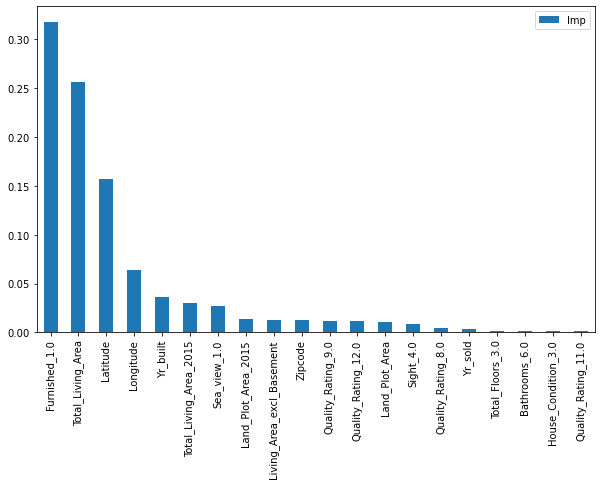

In [88]:
#DT
dt_imp_feature_1=pd.DataFrame(DT.feature_importances_, columns = ["Imp"], index = X_val.columns)
dt_imp_feature_1.sort_values(by="Imp",ascending=False)
dt_imp_feature_1['Imp'] = dt_imp_feature_1['Imp'].map('{0:.5f}'.format)
dt_imp_feature_1=dt_imp_feature_1.sort_values(by="Imp",ascending=False)
dt_imp_feature_1.Imp=dt_imp_feature_1.Imp.astype("float")

dt_imp_feature_1[:20].plot.bar(figsize=(10, 6))
print("First 10 feature importance:\t",(dt_imp_feature_1[:10].sum())*100)
print("First 15 feature importance:\t",(dt_imp_feature_1[:15].sum())*100)
print("First 20 feature importance:\t",(dt_imp_feature_1[:20].sum())*100)
print((dt_imp_feature_1[:20]))

First 10 feature importance:	 Imp    93.94
dtype: float64
First 15 feature importance:	 Imp    97.233
dtype: float64
First 20 feature importance:	 Imp    98.046
dtype: float64
                               Imp
Total_Living_Area          0.32352
Furnished_1.0              0.24557
Latitude                   0.15587
Longitude                  0.06672
Total_Living_Area_2015     0.03555
Sea_view_1.0               0.03520
Yr_built                   0.02618
Living_Area_excl_Basement  0.02227
Land_Plot_Area_2015        0.01441
Zipcode                    0.01411
Land_Plot_Area             0.01405
Sight_4.0                  0.00650
Quality_Rating_9.0         0.00487
Quality_Rating_12.0        0.00402
Quality_Rating_8.0         0.00349
Quality_Rating_11.0        0.00227
Yr_sold                    0.00204
Is_renovated_1             0.00132
Sight_3.0                  0.00130
Total_Floors_2.0           0.00120


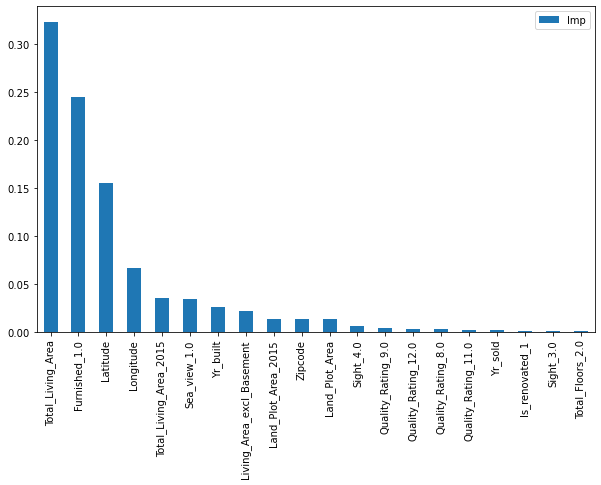

In [89]:
#RF
rf_imp_feature_1=pd.DataFrame(RF.feature_importances_, columns = ["Imp"], index = X_val.columns)
rf_imp_feature_1.sort_values(by="Imp",ascending=False)
rf_imp_feature_1['Imp'] = rf_imp_feature_1['Imp'].map('{0:.5f}'.format)
rf_imp_feature_1=rf_imp_feature_1.sort_values(by="Imp",ascending=False)
rf_imp_feature_1.Imp=rf_imp_feature_1.Imp.astype("float")

rf_imp_feature_1[:20].plot.bar(figsize=(10, 6))
print("First 10 feature importance:\t",(rf_imp_feature_1[:10].sum())*100)
print("First 15 feature importance:\t",(rf_imp_feature_1[:15].sum())*100)
print("First 20 feature importance:\t",(rf_imp_feature_1[:20].sum())*100)
print((rf_imp_feature_1[:20]))

First 10 feature importance:	 Imp    96.384
dtype: float64
First 15 feature importance:	 Imp    98.842
dtype: float64
First 20 feature importance:	 Imp    99.986
dtype: float64
                               Imp
Total_Living_Area          0.56202
Latitude                   0.09943
Total_Living_Area_2015     0.05331
Sea_view_1.0               0.04910
Quality_Rating_12.0        0.04726
Furnished_1.0              0.04113
Living_Area_excl_Basement  0.03770
Longitude                  0.03723
Sight_4.0                  0.02532
Quality_Rating_11.0        0.01134
Yr_built                   0.00921
Quality_Rating_13.0        0.00507
Is_renovated_1             0.00359
Land_Plot_Area             0.00355
Quality_Rating_9.0         0.00316
Bedrooms_4.0               0.00280
Land_Plot_Area_2015        0.00256
Bathrooms_2.5              0.00249
Zipcode                    0.00207
Yr_sold                    0.00152


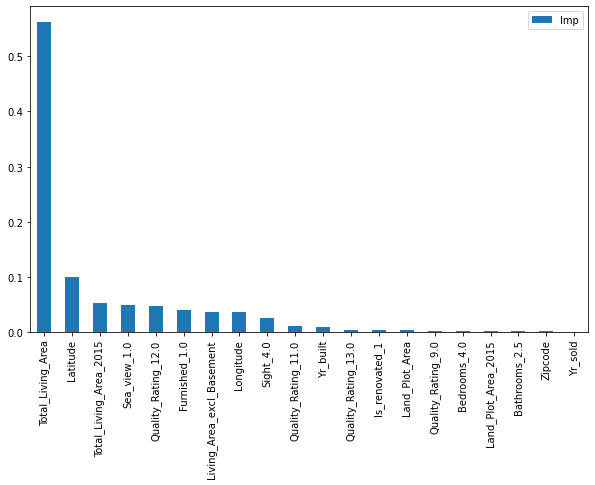

In [90]:
#AdaBoost
Ada_imp_feature_1=pd.DataFrame(Ada.feature_importances_, columns = ["Imp"], index = X_val.columns)
Ada_imp_feature_1.sort_values(by="Imp",ascending=False)
Ada_imp_feature_1['Imp'] = Ada_imp_feature_1['Imp'].map('{0:.5f}'.format)
Ada_imp_feature_1=Ada_imp_feature_1.sort_values(by="Imp",ascending=False)
Ada_imp_feature_1.Imp=Ada_imp_feature_1.Imp.astype("float")

Ada_imp_feature_1[:20].plot.bar(figsize=(10, 6))
print("First 10 feature importance:\t",(Ada_imp_feature_1[:10].sum())*100)
print("First 15 feature importance:\t",(Ada_imp_feature_1[:15].sum())*100)
print("First 20 feature importance:\t",(Ada_imp_feature_1[:20].sum())*100)
print((Ada_imp_feature_1[:20]))

First 10 feature importance:	 Imp    95.634
dtype: float64
First 15 feature importance:	 Imp    98.639
dtype: float64
First 20 feature importance:	 Imp    99.522
dtype: float64
                               Imp
Total_Living_Area          0.40060
Furnished_1.0              0.17540
Latitude                   0.15460
Longitude                  0.07017
Sea_view_1.0               0.04347
Total_Living_Area_2015     0.03670
Yr_built                   0.02912
Living_Area_excl_Basement  0.01987
Sight_4.0                  0.01368
Zipcode                    0.01273
Quality_Rating_9.0         0.00774
Quality_Rating_12.0        0.00731
Quality_Rating_8.0         0.00724
Land_Plot_Area             0.00409
Quality_Rating_11.0        0.00367
Sight_3.0                  0.00275
Quality_Rating_13.0        0.00237
Land_Plot_Area_2015        0.00197
House_Condition_5.0        0.00096
Yr_sold                    0.00078


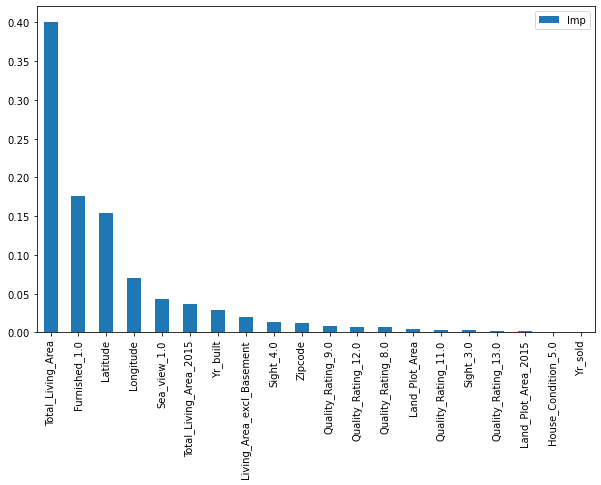

In [91]:
#GradientBoost
gb_imp_feature_1=pd.DataFrame(GB.feature_importances_, columns = ["Imp"], index = X_val.columns)
gb_imp_feature_1.sort_values(by="Imp",ascending=False)
gb_imp_feature_1['Imp'] = gb_imp_feature_1['Imp'].map('{0:.5f}'.format)
gb_imp_feature_1=gb_imp_feature_1.sort_values(by="Imp",ascending=False)
gb_imp_feature_1.Imp=gb_imp_feature_1.Imp.astype("float")

gb_imp_feature_1[:20].plot.bar(figsize=(10, 6))
print("First 10 feature importance:\t",(gb_imp_feature_1[:10].sum())*100)
print("First 15 feature importance:\t",(gb_imp_feature_1[:15].sum())*100)
print("First 20 feature importance:\t",(gb_imp_feature_1[:20].sum())*100)
print((gb_imp_feature_1[:20]))

In [92]:
impf=dummy[['Basement_Present_1','Bathrooms_2.25','Bathrooms_2.5','Bedrooms_4.0','Bedrooms_6.0','Furnished_1.0',
'House_Condition_3.0','House_Condition_5.0','Is_renovated_1','Land_Plot_Area','Land_Plot_Area_2015','Latitude',
'Living_Area_excl_Basement','Longitude','Quality_Rating_11.0','Quality_Rating_12.0','Quality_Rating_13.0',
'Quality_Rating_7.0','Quality_Rating_8.0','Quality_Rating_9.0','Sea_view_1.0','Sight_2.0','Sight_3.0','Sight_4.0',
'Total_Floors_2.0','Total_Living_Area','Total_Living_Area_2015','Yr_built','Yr_sold','Zipcode','Price']]
impf.shape

(21612, 31)

In [93]:
X1 = impf.drop("Price" , axis=1)
y1 = impf["Price"]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=10)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.2, random_state=10)

print(X1_train.shape)
print(X1_test.shape)
print(X1_val.shape)

(13831, 30)
(4323, 30)
(3458, 30)


## HyperTuning the models

### KNN

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
param_grid = {
    'n_neighbors': [100,500,2000],
    'weights': ['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn=KNeighborsRegressor()

grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 3)


grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

{'algorithm': 'auto', 'n_neighbors': 100, 'weights': 'distance'}


In [114]:
#KNN
knntuned=KNeighborsRegressor(algorithm='ball_tree', n_neighbors=10, weights='distance')
knntuned.fit(X_train, y_train)

y_knntuned_predtr= knntuned.predict(X_train)
y_knntuned_predvl= knntuned.predict(X_val)
y_knntuned_predts= knntuned.predict(X_test)


#train set
knntuned_trscore=r2_score(y_train,y_knntuned_predtr)
knntuned_trRMSE=np.sqrt(mean_squared_error(y_train, y_knntuned_predtr))
knntuned_trMSE=mean_squared_error(y_train, y_knntuned_predtr)
knntuned_trMAE=mean_absolute_error(y_train, y_knntuned_predtr)
#validation set
knntuned_vlscore=r2_score(y_val,y_knntuned_predvl)
knntuned_vknntunedMSE=np.sqrt(mean_squared_error(y_val, y_knntuned_predvl))
knntuned_vlMSE=mean_squared_error(y_val, y_knntuned_predvl)
knntuned_vlMAE=mean_absolute_error(y_val, y_knntuned_predvl)
#test set
knntuned_tsscore=r2_score(y_test,y_knntuned_predts)
knntuned_tsRMSE=np.sqrt(mean_squared_error(y_test, y_knntuned_predts))
knntuned_tsMSE=mean_squared_error(y_test, y_knntuned_predts)
knntuned_tsMAE=mean_absolute_error(y_test, y_knntuned_predts)


ScoreTuneddf1=pd.DataFrame({'Method':['KNN'],'Train Set Score':knntuned_trscore,'Train RMSE': knntuned_trRMSE, 'Train MAE': knntuned_trMAE, 'Validation Set Score':knntuned_vlscore,'VL RMSE': knntuned_vknntunedMSE, 'VL MAE': knntuned_vlMAE,'Test Set Score':knntuned_tsscore,'Test RMSE': knntuned_tsRMSE, 'Test MAE': knntuned_tsMAE})
ScoreTuneddf1

,Method,Train Set Score,Train RMSE,Train MAE,Validation Set Score,VL RMSE,VL MAE,Test Set Score,Test RMSE,Test MAE
0,KNN,1.000,"2,194.017",71.669,0.498,"237,702.556","152,253.945",0.514,"262,188.676","154,702.075"


### Decision Tree

In [ ]:
param_grid = {
    'max_depth': [6,8,10,12],
    'min_samples_leaf': [3,4,5,6,7],
    'min_samples_split': [8,10,12],
}

dtr=DecisionTreeRegressor(random_state=1)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 2)


grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

In [95]:
#Decision Tree
DTtuned=DecisionTreeRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=12)
DTtuned.fit(X_train, y_train)

y_DTtuned_predtr= DTtuned.predict(X_train)
y_DTtuned_predvl= DTtuned.predict(X_val)
y_DTtuned_predts= DTtuned.predict(X_test)


#train set
DTtuned_trscore=r2_score(y_train,y_DTtuned_predtr)
DTtuned_trRMSE=np.sqrt(mean_squared_error(y_train, y_DTtuned_predtr))
DTtuned_trMSE=mean_squared_error(y_train, y_DTtuned_predtr)
DTtuned_trMAE=mean_absolute_error(y_train, y_DTtuned_predtr)
#validation set
DTtuned_vlscore=r2_score(y_val,y_DTtuned_predvl)
DTtuned_vDTMSE=np.sqrt(mean_squared_error(y_val, y_DTtuned_predvl))
DTtuned_vlMSE=mean_squared_error(y_val, y_DTtuned_predvl)
DTtuned_vlMAE=mean_absolute_error(y_val, y_DTtuned_predvl)
#test set
DTtuned_tsscore=r2_score(y_test,y_DTtuned_predts)
DTtuned_tsRMSE=np.sqrt(mean_squared_error(y_test, y_DTtuned_predts))
DTtuned_tsMSE=mean_squared_error(y_test, y_DTtuned_predts)
DTtuned_tsMAE=mean_absolute_error(y_test, y_DTtuned_predts)


DTtuneddf=pd.DataFrame({'Method':['Decision Tree'],'Train Set Score':DTtuned_trscore,'Train RMSE': DTtuned_trRMSE, 'Train MAE': DTtuned_trMAE, 'Validation Set Score':DTtuned_vlscore,'VL RMSE': DTtuned_vDTMSE, 'VL MAE': DTtuned_vlMAE,'Test Set Score':DTtuned_tsscore,'Test RMSE': DTtuned_tsRMSE, 'Test MAE': DTtuned_tsMAE})
ScoreTuneddf1= pd.concat([ScoreTuneddf1, DTtuneddf])
ScoreTuneddf1

,Method,Train Set Score,Train RMSE,Train MAE,Validation Set Score,VL RMSE,VL MAE,Test Set Score,Test RMSE,Test MAE
0,KNN,0.999965,2194.017175,71.669004,0.497648,237702.555632,152253.945039,0.513812,262188.676378,154702.074784
0,Decision Tree,0.892500,122034.639279,72534.623356,0.784949,155525.183203,89081.875427,0.791219,171813.628531,92277.094618


In [96]:
DTtuneddf

,Method,Train Set Score,Train RMSE,Train MAE,Validation Set Score,VL RMSE,VL MAE,Test Set Score,Test RMSE,Test MAE
0,Decision Tree,0.8925,122034.639279,72534.623356,0.784949,155525.183203,89081.875427,0.791219,171813.628531,92277.094618


### Random Forest

In [ ]:
#Random Forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [20,40],
    'max_features': [10,20],
    'min_samples_leaf': [5, 10],
    'min_samples_split': [10, 50],
    'n_estimators': [100,300,500]
}

RF1 = RandomForestRegressor(random_state=1)

grid_search = GridSearchCV(estimator = RF1, param_grid = param_grid, cv = 2)
grid_search.fit(X_train,y_train)
grid_search.best_params_

In [97]:
#Random Forest
RFtuned=RandomForestRegressor(max_depth=60, min_samples_leaf=5,min_samples_split=10,n_estimators=500)
RFtuned.fit(X_train, y_train)

y_RFtuned_predtr= RFtuned.predict(X_train)
y_RFtuned_predvl= RFtuned.predict(X_val)
y_RFtuned_predts= RFtuned.predict(X_test)


#train set
RFtuned_trscore=r2_score(y_train,y_RFtuned_predtr)
RFtuned_trRMSE=np.sqrt(mean_squared_error(y_train, y_RFtuned_predtr))
RFtuned_trMSE=mean_squared_error(y_train, y_RFtuned_predtr)
RFtuned_trMAE=mean_absolute_error(y_train, y_RFtuned_predtr)
#validation set
RFtuned_vlscore=r2_score(y_val,y_RFtuned_predvl)
RFtuned_vRFtunedMSE=np.sqrt(mean_squared_error(y_val, y_RFtuned_predvl))
RFtuned_vlMSE=mean_squared_error(y_val, y_RFtuned_predvl)
RFtuned_vlMAE=mean_absolute_error(y_val, y_RFtuned_predvl)
#test set
RFtuned_tsscore=r2_score(y_test,y_RFtuned_predts)
RFtuned_tsRMSE=np.sqrt(mean_squared_error(y_test, y_RFtuned_predts))
RFtuned_tsMSE=mean_squared_error(y_test, y_RFtuned_predts)
RFtuned_tsMAE=mean_absolute_error(y_test, y_RFtuned_predts)


RFtuneddf=pd.DataFrame({'Method':['Random Forest'],'Train Set Score':RFtuned_trscore,'Train RMSE': RFtuned_trRMSE, 'Train MAE': RFtuned_trMAE, 'Validation Set Score':RFtuned_vlscore,'VL RMSE': RFtuned_vRFtunedMSE, 'VL MAE': RFtuned_vlMAE,'Test Set Score':RFtuned_tsscore,'Test RMSE': RFtuned_tsRMSE, 'Test MAE': RFtuned_tsMAE})
ScoreTuneddf1= pd.concat([ScoreTuneddf1, RFtuneddf])
ScoreTuneddf1

,Method,Train Set Score,Train RMSE,Train MAE,Validation Set Score,VL RMSE,VL MAE,Test Set Score,Test RMSE,Test MAE
0,KNN,0.999965,2194.017175,71.669004,0.497648,237702.555632,152253.945039,0.513812,262188.676378,154702.074784
0,Decision Tree,0.892500,122034.639279,72534.623356,0.784949,155525.183203,89081.875427,0.791219,171813.628531,92277.094618
0,Random Forest,0.936306,93935.139660,46211.195004,0.857120,126769.835703,71050.483287,0.876708,132031.955063,72040.905149


In [98]:
RFtuneddf

,Method,Train Set Score,Train RMSE,Train MAE,Validation Set Score,VL RMSE,VL MAE,Test Set Score,Test RMSE,Test MAE
0,Random Forest,0.936306,93935.13966,46211.195004,0.85712,126769.835703,71050.483287,0.876708,132031.955063,72040.905149


### Bagging

In [ ]:
param_grid = {
    'n_estimators': [10,100,500],
    'random_state': [1,50],
    }

Bag1 = BaggingRegressor()

grid_search = GridSearchCV(estimator = Bag1, param_grid = param_grid, cv = 2)
grid_search.fit(X_train,y_train)
grid_search.best_params_

In [99]:
#Bagging
#a=RandomForestRegressor(max_depth=60, min_samples_leaf=5,min_samples_split=10,n_estimators=500)
BGGtuned=BaggingRegressor(n_estimators=500, random_state=50)
BGGtuned.fit(X_train, y_train)

y_BGGtuned_predtr= BGGtuned.predict(X_train)
y_BGGtuned_predvl= BGGtuned.predict(X_val)
y_BGGtuned_predts= BGGtuned.predict(X_test)


#train set
BGGtuned_trscore=r2_score(y_train,y_BGGtuned_predtr)
BGGtuned_trRMSE=np.sqrt(mean_squared_error(y_train, y_BGGtuned_predtr))
BGGtuned_trMSE=mean_squared_error(y_train, y_BGGtuned_predtr)
BGGtuned_trMAE=mean_absolute_error(y_train, y_BGGtuned_predtr)
#validation set
BGGtuned_vlscore=r2_score(y_val,y_BGGtuned_predvl)
BGGtuned_vBGGtunedMSE=np.sqrt(mean_squared_error(y_val, y_BGGtuned_predvl))
BGGtuned_vlMSE=mean_squared_error(y_val, y_BGGtuned_predvl)
BGGtuned_vlMAE=mean_absolute_error(y_val, y_BGGtuned_predvl)
#test set
BGGtuned_tsscore=r2_score(y_test,y_BGGtuned_predts)
BGGtuned_tsRMSE=np.sqrt(mean_squared_error(y_test, y_BGGtuned_predts))
BGGtuned_tsMSE=mean_squared_error(y_test, y_BGGtuned_predts)
BGGtuned_tsMAE=mean_absolute_error(y_test, y_BGGtuned_predts)


BGGtuneddf=pd.DataFrame({'Method':['Bagging'],'Train Set Score':BGGtuned_trscore,'Train RMSE': BGGtuned_trRMSE, 'Train MAE': BGGtuned_trMAE, 'Validation Set Score':BGGtuned_vlscore,'VL RMSE': BGGtuned_vBGGtunedMSE, 'VL MAE': BGGtuned_vlMAE,'Test Set Score':BGGtuned_tsscore,'Test RMSE': BGGtuned_tsRMSE, 'Test MAE': BGGtuned_tsMAE})
ScoreTuneddf1= pd.concat([ScoreTuneddf1, BGGtuneddf])
ScoreTuneddf1


,Method,Train Set Score,Train RMSE,Train MAE,Validation Set Score,VL RMSE,VL MAE,Test Set Score,Test RMSE,Test MAE
0,KNN,0.999965,2194.017175,71.669004,0.497648,237702.555632,152253.945039,0.513812,262188.676378,154702.074784
0,Decision Tree,0.892500,122034.639279,72534.623356,0.784949,155525.183203,89081.875427,0.791219,171813.628531,92277.094618
0,Random Forest,0.936306,93935.139660,46211.195004,0.857120,126769.835703,71050.483287,0.876708,132031.955063,72040.905149
0,Bagging,0.982602,49093.731721,25811.597227,0.864208,123585.231472,69504.227978,0.885816,127061.880803,70130.718977


In [100]:
BGGtuneddf

,Method,Train Set Score,Train RMSE,Train MAE,Validation Set Score,VL RMSE,VL MAE,Test Set Score,Test RMSE,Test MAE
0,Bagging,0.982602,49093.731721,25811.597227,0.864208,123585.231472,69504.227978,0.885816,127061.880803,70130.718977


### AdaBoost

In [ ]:
param_grid = {
    'n_estimators': [10,100,500],
    'learning_rate': [1.0,2.0],
    'loss': ['linear','square','exponential'],
    'random_state': [1,50],
    }

Ada1 = AdaBoostRegressor()

grid_search = GridSearchCV(estimator = Ada1, param_grid = param_grid, cv = 2)
grid_search.fit(X_train,y_train)
grid_search.best_params_

In [101]:
#AdaBoost
AdaTuned = AdaBoostRegressor(learning_rate=1.0, loss='exponential', n_estimators=10, random_state=50)
AdaTuned.fit(X_train, y_train)

y_Adapredtr= AdaTuned.predict(X_train)
y_Adapredvl= AdaTuned.predict(X_val)
y_Adapredts= AdaTuned.predict(X_test)


#train set
AdaTuned_trscore=r2_score(y_train,y_Adapredtr)
AdaTuned_trRMSE=np.sqrt(mean_squared_error(y_train, y_Adapredtr))
AdaTuned_trMSE=mean_squared_error(y_train, y_Adapredtr)
AdaTuned_trMAE=mean_absolute_error(y_train, y_Adapredtr)
#validation set
AdaTuned_vlscore=r2_score(y_val,y_Adapredvl)
AdaTuned_vDTMSE=np.sqrt(mean_squared_error(y_val, y_Adapredvl))
AdaTuned_vlMSE=mean_squared_error(y_val, y_Adapredvl)
AdaTuned_vlMAE=mean_absolute_error(y_val, y_Adapredvl)
#test set
AdaTuned_tsscore=r2_score(y_test,y_Adapredts)
AdaTuned_tsRMSE=np.sqrt(mean_squared_error(y_test, y_Adapredts))
AdaTuned_tsMSE=mean_squared_error(y_test, y_Adapredts)
AdaTuned_tsMAE=mean_absolute_error(y_test, y_Adapredts)


Adatuneddf=pd.DataFrame({'Method':['AdaBoost'],'Train Set Score':AdaTuned_trscore,'Train RMSE': AdaTuned_trRMSE, 'Train MAE': AdaTuned_trMAE, 'Validation Set Score':AdaTuned_vlscore,'VL RMSE': AdaTuned_vDTMSE, 'VL MAE': AdaTuned_vlMAE,'Test Set Score':AdaTuned_tsscore,'Test RMSE': AdaTuned_tsRMSE, 'Test MAE': AdaTuned_tsMAE})
ScoreTuneddf1= pd.concat([ScoreTuneddf1, Adatuneddf])
ScoreTuneddf1

,Method,Train Set Score,Train RMSE,Train MAE,Validation Set Score,VL RMSE,VL MAE,Test Set Score,Test RMSE,Test MAE
0,KNN,0.999965,2194.017175,71.669004,0.497648,237702.555632,152253.945039,0.513812,262188.676378,154702.074784
0,Decision Tree,0.892500,122034.639279,72534.623356,0.784949,155525.183203,89081.875427,0.791219,171813.628531,92277.094618
0,Random Forest,0.936306,93935.139660,46211.195004,0.857120,126769.835703,71050.483287,0.876708,132031.955063,72040.905149
0,Bagging,0.982602,49093.731721,25811.597227,0.864208,123585.231472,69504.227978,0.885816,127061.880803,70130.718977
0,AdaBoost,0.682694,209661.074052,154433.178466,0.594640,213525.795096,155223.653818,0.646691,223506.029675,157095.559206


In [102]:
Adatuneddf

,Method,Train Set Score,Train RMSE,Train MAE,Validation Set Score,VL RMSE,VL MAE,Test Set Score,Test RMSE,Test MAE
0,AdaBoost,0.682694,209661.074052,154433.178466,0.59464,213525.795096,155223.653818,0.646691,223506.029675,157095.559206


### GradientBoost

In [ ]:
param_grid = {
    'loss':['ls','huber'],
    'max_features': ['auto','sqrt'],
    'learning_rate': [0.1,0.5],
    'max_depth': [5,15],
    'min_samples_leaf': [5,10],
    'min_samples_split': [10,65],
    'n_estimators': [300,700],
    'subsample':[0.6,1]
}
GBR=GradientBoostingRegressor(random_state=2)

grid_searchF = GridSearchCV(estimator = GBR, param_grid = param_grid, 
                          cv = 2, n_jobs = 2, verbose = 1)
grid_searchF.fit(X_train,y_train)
grid_searchF.best_params_

In [103]:
#GradientBoost
GB1 = GradientBoostingRegressor(loss='huber',
        learning_rate=0.1,
        n_estimators=1000,
        subsample=1.0,
        min_samples_split=50,
        min_samples_leaf=5,
        max_depth=5,
        random_state=22,
        alpha=0.9,)
GB1.fit(X_train, y_train)

y_GBpredtr= GB1.predict(X_train)
y_GBpredvl= GB1.predict(X_val)
y_GBpredts= GB1.predict(X_test)


#train set
GB1_trscore=r2_score(y_train,y_GBpredtr)
GB1_trRMSE=np.sqrt(mean_squared_error(y_train, y_GBpredtr))
GB1_trMSE=mean_squared_error(y_train, y_GBpredtr)
GB1_trMAE=mean_absolute_error(y_train, y_GBpredtr)
#validation set
GB1_vlscore=r2_score(y_val,y_GBpredvl)
GB1_vDTMSE=np.sqrt(mean_squared_error(y_val, y_GBpredvl))
GB1_vlMSE=mean_squared_error(y_val, y_GBpredvl)
GB1_vlMAE=mean_absolute_error(y_val, y_GBpredvl)
#test set
GB1_tsscore=r2_score(y_test,y_GBpredts)
GB1_tsRMSE=np.sqrt(mean_squared_error(y_test, y_GBpredts))
GB1_tsMSE=mean_squared_error(y_test, y_GBpredts)
GB1_tsMAE=mean_absolute_error(y_test, y_GBpredts)


GBtuneddf=pd.DataFrame({'Method':['GradientBoost'],'Train Set Score':GB1_trscore,'Train RMSE': GB1_trRMSE, 'Train MAE': GB1_trMAE, 'Validation Set Score':GB1_vlscore,'VL RMSE': GB1_vDTMSE, 'VL MAE': GB1_vlMAE,'Test Set Score':GB1_tsscore,'Test RMSE': GB1_tsRMSE, 'Test MAE': GB1_tsMAE})
ScoreTuneddf1= pd.concat([ScoreTuneddf1, GBtuneddf])
ScoreTuneddf1

,Method,Train Set Score,Train RMSE,Train MAE,Validation Set Score,VL RMSE,VL MAE,Test Set Score,Test RMSE,Test MAE
0,KNN,0.999965,2194.017175,71.669004,0.497648,237702.555632,152253.945039,0.513812,262188.676378,154702.074784
0,Decision Tree,0.892500,122034.639279,72534.623356,0.784949,155525.183203,89081.875427,0.791219,171813.628531,92277.094618
0,Random Forest,0.936306,93935.139660,46211.195004,0.857120,126769.835703,71050.483287,0.876708,132031.955063,72040.905149
0,Bagging,0.982602,49093.731721,25811.597227,0.864208,123585.231472,69504.227978,0.885816,127061.880803,70130.718977
0,AdaBoost,0.682694,209661.074052,154433.178466,0.594640,213525.795096,155223.653818,0.646691,223506.029675,157095.559206
0,GradientBoost,0.967958,66625.266708,37403.887101,0.899170,106494.063904,61809.651605,0.900567,118570.452351,64707.826064


In [104]:
GBtuneddf

,Method,Train Set Score,Train RMSE,Train MAE,Validation Set Score,VL RMSE,VL MAE,Test Set Score,Test RMSE,Test MAE
0,GradientBoost,0.967958,66625.266708,37403.887101,0.89917,106494.063904,61809.651605,0.900567,118570.452351,64707.826064


In [105]:
Score_after_Tuning_df=ScoreTuneddf1.copy()
Score_after_Tuning_df

,Method,Train Set Score,Train RMSE,Train MAE,Validation Set Score,VL RMSE,VL MAE,Test Set Score,Test RMSE,Test MAE
0,KNN,0.999965,2194.017175,71.669004,0.497648,237702.555632,152253.945039,0.513812,262188.676378,154702.074784
0,Decision Tree,0.892500,122034.639279,72534.623356,0.784949,155525.183203,89081.875427,0.791219,171813.628531,92277.094618
0,Random Forest,0.936306,93935.139660,46211.195004,0.857120,126769.835703,71050.483287,0.876708,132031.955063,72040.905149
0,Bagging,0.982602,49093.731721,25811.597227,0.864208,123585.231472,69504.227978,0.885816,127061.880803,70130.718977
0,AdaBoost,0.682694,209661.074052,154433.178466,0.594640,213525.795096,155223.653818,0.646691,223506.029675,157095.559206
0,GradientBoost,0.967958,66625.266708,37403.887101,0.899170,106494.063904,61809.651605,0.900567,118570.452351,64707.826064


### Models Comparison

In [106]:
pd.options.display.float_format = "{:,.3f}".format
Score_before_Tuning_df[['Method','Train Set Score','Train RMSE','Train MAE','Validation Set Score','VL RMSE','VL MAE']].set_index(['Method'])

,Train Set Score,Train RMSE,Train MAE,Validation Set Score,VL RMSE,VL MAE
Method,,,,,,
Linear Regression,0.751,"185,664.026","117,361.680",0.722,"176,957.798","115,768.905"
Ridge,0.749,"186,456.303","118,055.010",0.720,"177,421.823","116,283.410"
Lasso,0.751,"185,665.279","117,375.103",0.722,"176,941.666","115,759.006"
KNN,0.672,"213,190.487","129,999.900",0.467,"244,777.503","157,857.103"
Decision Tree,1.000,"2,194.017",71.669,0.674,"191,411.034","101,401.362"
Random Forest,0.982,"49,693.283","26,077.543",0.865,"123,146.018","69,935.498"
Bagging,0.974,"60,012.467","30,181.366",0.849,"130,444.046","74,111.953"
AdaBoost,0.275,"316,966.423","286,823.650",0.087,"320,524.309","288,111.433"
GradientBoost,0.903,"115,856.969","73,362.355",0.853,"128,725.192","77,148.948"


In [107]:
pd.options.display.float_format = "{:,.3f}".format
Score_after_Tuning_df[['Method','Train Set Score','Train RMSE','Train MAE','Validation Set Score','VL RMSE','VL MAE','Test Set Score','Test RMSE','Test MAE']].set_index(['Method'])

,Train Set Score,Train RMSE,Train MAE,Validation Set Score,VL RMSE,VL MAE,Test Set Score,Test RMSE,Test MAE
Method,,,,,,,,,
KNN,1.000,"2,194.017",71.669,0.498,"237,702.556","152,253.945",0.514,"262,188.676","154,702.075"
Decision Tree,0.892,"122,034.639","72,534.623",0.785,"155,525.183","89,081.875",0.791,"171,813.629","92,277.095"
Random Forest,0.936,"93,935.140","46,211.195",0.857,"126,769.836","71,050.483",0.877,"132,031.955","72,040.905"
Bagging,0.983,"49,093.732","25,811.597",0.864,"123,585.231","69,504.228",0.886,"127,061.881","70,130.719"
AdaBoost,0.683,"209,661.074","154,433.178",0.595,"213,525.795","155,223.654",0.647,"223,506.030","157,095.559"
GradientBoost,0.968,"66,625.267","37,403.887",0.899,"106,494.064","61,809.652",0.901,"118,570.452","64,707.826"
